# GenAI and Data Science Final Project


1/10/2025 - 22/10/2025

Esteban Velasquez Mariucci

114502904

make the code create a folder for all output

##0. Requirements

**Runtime Versions**:

python      : 3.12.12

pandas      : 2.2.2

numpy       : 2.0.2

matplotlib  : 3.10.0

seaborn     : 0.13.2

statsmodels : 0.14.5

Code provided below at library imports.

####**Please write your URL of the DataSheet provided below**



In [161]:
myURL = "/content/drive/MyDrive/University/National Central University/GenAI and DS/Final Project/DataSheet.csv"

## 1. Introduction
###1.1 Topic
This project focuses on the monetary and financial conditions of selected European economies, using indicators provided by the Organization for Economic Cooperation and Development (OECD). These monetary and financial indicators are frontline measures of economic stability and policy effectiveness. They are deeply connected to credit activity, bank lending, risk-taking, and asset pricing, which makes their evaluation a central priority for understanding the dynamics of modern financial systems.

I decided to work with these indicators because they play such a major role in shaping economies, they’re often the first signs of change, whether positive or negative. They’re also entry-level indicators, which made them perfect for my level of experience and for practicing real economic analysis. I chose the OECD as my data source mainly for its reliability, accessibility, and vast historical coverage. Their datasets are well-structured, transparent, and consistent, making them ideal for technical work like this.

The indicators I selected were originally chosen because they were the most available for European analysis within the OECD database. However, as I explored them, I became genuinely interested in seeing how they related to one another. Analyzing their correlations and how they move together over time turned out to be a very rewarding experience. The dataset captures several major economic events, such as the COVID-19 shock, recent inflation surges, and earlier financial downturns, which gave me a clear historical context for understanding how economies react to crises and recoveries. Overall, this analysis provides a general picture of how Europe’s financial landscape evolves, helping interpret current trends and policy decisions through the lens of economic history.
###1.2 Personal Project Motivation
The intersection between computer engineering and finance fascinates me, so I wanted to choose a topic that combines both fields. My interest in finance actually started before university, when I took an introductory finance course that focused on understanding the basics of the financial system. That experience made me realize how much I enjoy analyzing markets and interpreting data-driven insights. Since then, my goal has been to work in finance, and I see programming and data science as essential tools for modern financial analysis.

Coding and data analysis give me a different perspective compared to traditional economic methods. They make data exploration faster, more accessible, and more transparent, a more democratic way of analyzing economies. Working with European data felt natural because I live here, and understanding the region’s financial behavior and policies is something I find both personally and academically relevant.

Throughout the project, I enjoyed seeing how the data reflected real-world dynamics. The dataset was surprisingly complete, but it was also challenging because many indicators are tied to the euro, which most European countries share. That makes comparisons tricky but also very interesting, since you can see how countries with the same currency still differ in policy outcomes. This project helped me develop both technical and analytical skills, and it gave me a clearer sense of how data science can strengthen financial understanding. More importantly, it confirmed that this intersection, using computational tools to study finance, is where I want to continue growing professionally.
###1.3 Data Sources
The OECD provided accurate and up-to-date data that is highly accessible to the public. The dataset I chose consists of 26 European countries, each represented through monthly monetary and financial indicators covering several years of observation. The data is well-structured, standardized, and includes detailed metadata such as measurement units, methodologies, and frequency, which made it easier to process and interpret. You can find the exact same data here: [OECD Data](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_STES%40DF_FINMARK&df[ag]=OECD.SDD.STES&dq=AUT%2BBEL%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BITA%2BLVA%2BLTU%2BLUX%2BNLD%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BGBR.M.CC%2BCCRE%2BIRLT%2BIR3TIB%2BIRSTCI%2BSHARE.XDC_USD%2BPA%2BIX.....&pd=1950-01%2C2025-09&to[TIME_PERIOD]=false&vw=tb)
###1.4 Indicator and measurements
In this project, we analyze important economic indicators and their measurements from these 26 European countries. The indicators used include:

- **Long-term interest rates (Percent per annum)**: These rates are derived from the yields on government bonds with longer maturities, like 10-year bonds. They reflect market expectations over a longer horizon.

- **Short-term interest rates (Percent per annum)**: They are based on central bank policy rates or interbank lending rates. They get annualized for easy comparison with other rates. In simple terms they indicate short-term borrowing costs for general bank customers.

- **Nominal exchange rates (National currency per US dollar)**: These represent the straightforward exchange values between national currencies and the US dollar. It is important to note that, While many of these countries use the euro, others like Poland or Hungary have their own currencies, which can lead to higher numerical exchange rates.

- **Real effective exchange rates CPI-based (Index)**: These index values that adjust nominal rates for inflation differences, allowing us to see the currency’s value in real terms relative to a base period.

- **Share price (Index)**: Share prices are often presented as an index as well, showing how stock values move compared to a base year.

For ease and confort of understanding, here's a description of each measurment type and how they're calculated:

- **Percent per annum**: Expresses interest rates as a yearly percentage of the principal.

- **National currency per US dollar**: Indicates how much of a country’s currency is needed to buy one US dollar. This measurement reflects the direct value of a currency.

- **Index**: Represents relative values compared to a base period, which is usually set to 100. The formula is: (Current Value / Base Value) × 100, where the base value is normally a value that represents a “normal” economic period. This measurement is adjusted for inflation for the real effective exchange rates using the Consumer Price Index (CPI-based).


## 2. Data Analysis and Modeling


##2.1 Configuring Data

###2.1.1 Setting Up Libraries and Dependencies

In [162]:
!pip install -q pandas matplotlib seaborn openpyxl statsmodels

import platform, importlib
from google.colab import drive
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.arima.model import ARIMA

- **google.colab.drive**: This is a library that mounts Google Drive so the notebook can read and write files.

- **os**: The standard Python library for working with paths and directories in your local machine.

- **pandas (pd)**: It's the core data toolkit. I mainly use it to read CSV/Excel files, select and rename columns, parse dates, group and pivot data, compute summary statistics, and export results to CSV.

- **seaborn (sns)**: Seaborn is high-level plotting library built on matplotlib that I use for statistical visualizations. It helped me create the completeness heatmap, multi-country time-series lines, cross-country comparisons, boxplots of distributions, and correlation heatmaps.

- **matplotlib.pyplot (plt)**: This is the plotting backend and figure controller. I use it to set figure sizes, add titles and labels, control legends, and save figures, plus any direct plotting done with plt.plot.

- **statsmodels.tsa.arima.model.ARIMA**: This is the classical ARIMA model for time-series forecasting. I use for the Forecasting (ARIMA) to fit models on selected indicator-country series and to generate 12-month-ahead forecasts.

- **openpyxl**: This Library I implicitly use through pandas for the Excel engine to read .xlsx files.

In [163]:
pkgs = {
    "python": platform.python_version(),
    "pandas": importlib.import_module("pandas").__version__,
    "numpy": importlib.import_module("numpy").__version__,
    "matplotlib": importlib.import_module("matplotlib").__version__,
    "seaborn": importlib.import_module("seaborn").__version__,
    "statsmodels": importlib.import_module("statsmodels").__version__,
}

print("Runtime Versions")
for name in ["python","pandas","numpy","matplotlib","seaborn","statsmodels"]:
    print(f"{name:12s}: {pkgs[name]}")


Runtime Versions
python      : 3.12.12
pandas      : 2.2.2
numpy       : 2.0.2
matplotlib  : 3.10.0
seaborn     : 0.13.2
statsmodels : 0.14.5


###2.1.2 Load Data

In [164]:
data_source = myURL

if data_source.endswith(".csv"):
    df = pd.read_csv(data_source)
else:
    df = pd.read_excel(data_source)

###2.1.3 Clean Data

Before starting any analysis, it’s essential to isolate only the columns that are relevant to the study. The original OECD dataset contains 34 columns, many of which are metadata or identifiers not needed for modeling. Here, we keep only the fields that identify the country, date, indicator type, unit of measurement, and numeric value.
We also rename the columns to simpler, more descriptive names for readability in later steps.

In [165]:
clean_df = df[[
    "Reference area", "REF_AREA", "TIME_PERIOD",
    "Measure", "Unit of measure", "OBS_VALUE", "UNIT_MULT"
]].copy()

clean_df = clean_df.rename(columns={
    "Reference area": "country",
    "REF_AREA": "iso_code",
    "TIME_PERIOD": "date",
    "Measure": "indicator",
    "Unit of measure": "measurement",
    "OBS_VALUE": "value_original",
    "UNIT_MULT": "unit_multiplier"
})

clean_df["date"] = pd.to_datetime(clean_df["date"], errors="coerce")
clean_df["value_original"] = pd.to_numeric(clean_df["value_original"], errors="coerce")

The dataset contains dozens of economic indicators, but this project focuses on the six most relevant to analyzing financial and monetary stability. We can then filter these, to ensure the analysis stays consistent and focused on the indicators that represent interest rates, exchange rates, and market performance.

In [166]:
indicators = [
    "Nominal exchange rates",
    "Real effective exchange rates - CPI based",
    "Long-term interest rates",
    "Short-term interest rates",
    "Immediate interest rates (call money/interbank rate)",
    "Share prices"
]
clean_df = clean_df[clean_df["indicator"].isin(indicators)]

OECD datasets include a unit multiplier to indicate the scale of the data (e.g., thousands, millions). In this case it is a 0 multiplier all around meaning data is in its natural scale. Still, We apply this multiplier for good practice. This ensures that all data points are comparable across countries and indicators.

In [167]:
clean_df["value_scaled"] = clean_df["value_original"] * (10 ** clean_df["unit_multiplier"].astype(float))

clean_df = clean_df.sort_values(["indicator", "measurement", "country", "date"]).reset_index(drop=True)

print("Cleaned dataset structure:")
print(clean_df.info())
display(clean_df.head(10))

Cleaned dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61463 entries, 0 to 61462
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          61463 non-null  object        
 1   iso_code         61463 non-null  object        
 2   date             61463 non-null  datetime64[ns]
 3   indicator        61463 non-null  object        
 4   measurement      61463 non-null  object        
 5   value_original   61463 non-null  float64       
 6   unit_multiplier  61463 non-null  int64         
 7   value_scaled     61463 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.8+ MB
None


country iso_code       date                 indicator        measurement  \
0  Austria      AUT 1990-01-01  Long-term interest rates  Percent per annum   
1  Austria      AUT 1990-02-01  Long-term interest rates  Percent per annum   
2  Austria      AUT 1990-03-01  Long-term interest rates  Percent per annum   
3  Austria      AUT 1990-04-01  Long-term interest rates  Percent per annum   
4  Austria      AUT 1990-05-01  Long-term interest rates  Percent per annum   
5  Austria      AUT 1990-06-01  Long-term interest rates  Percent per annum   
6  Austria      AUT 1990-07-01  Long-term interest rates  Percent per annum   
7  Austria      AUT 1990-08-01  Long-term interest rates  Percent per annum   
8  Austria      AUT 1990-09-01  Long-term interest rates  Percent per annum   
9  Austria      AUT 1990-10-01  Long-term interest rates  Percent per annum   

   value_original  unit_multiplier  value_scaled  
0            8.17                0          8.17  
1            8.60                0          8.60  
2            8.56                0          8.56  
3            8.68                0          8.68  
4            8.83                0          8.83  
5            8.84                0          8.84  
6            8.67                0          8.67  
7            8.83                0          8.83  
8            8.99                0          8.99  
9            9.02                0          9.02

Quick check for the multipliers



In [168]:
print("\nUnique unit multipliers per indicator/measurement:")
display(clean_df.groupby(["indicator", "measurement"])["unit_multiplier"].unique())


Unique unit multipliers per indicator/measurement:


indicator                                  measurement                    
Long-term interest rates                   Percent per annum                  [0]
Nominal exchange rates                     National currency per US dollar    [0]
Real effective exchange rates - CPI based  Index                              [0]
Share prices                               Index                              [0]
Short-term interest rates                  Percent per annum                  [0]
Name: unit_multiplier, dtype: object

Now we must understand the availability of data across time and countries, so we create a completeness matrix.
This heatmap visually displays where data exists (dark blue) and where it’s missing (white). It helps identify gaps of some countries, since some have shorter historical records than others.

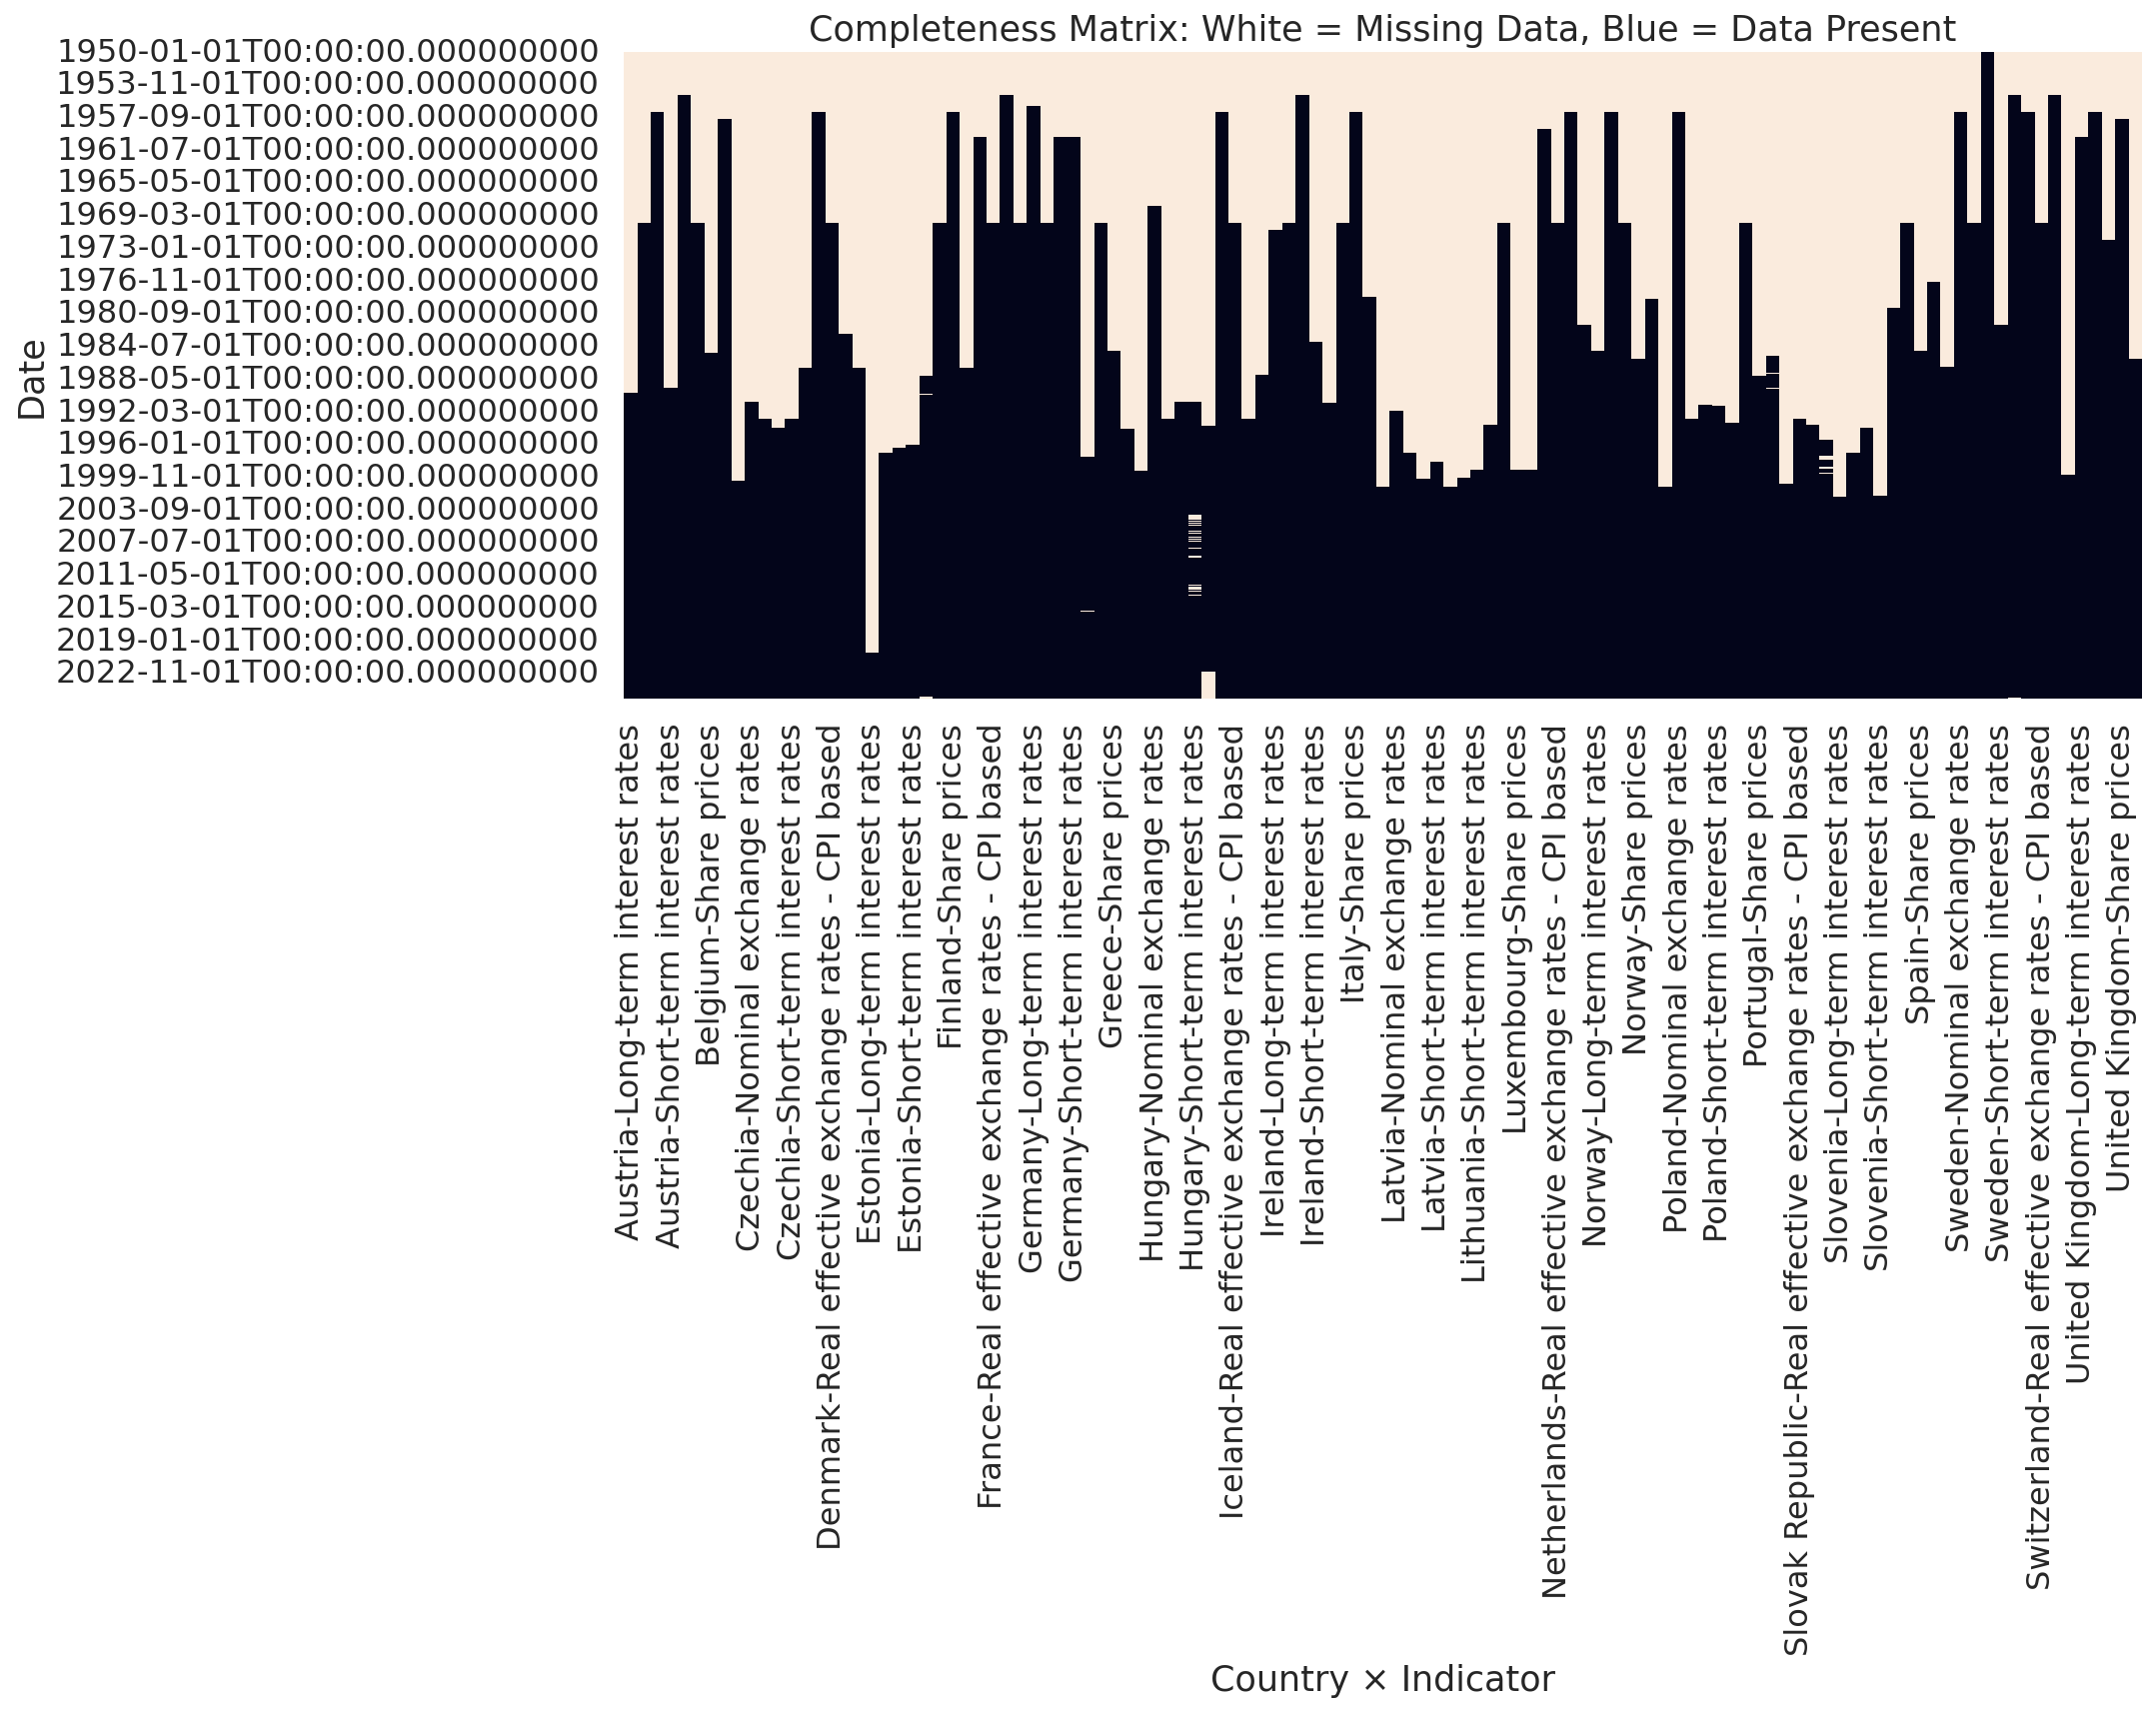

In [169]:
pivot = clean_df.pivot_table(
    index="date",
    columns=["country", "indicator"],
    values="value_scaled"
)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot.isna(), cbar=False)
plt.title("Completeness Matrix: White = Missing Data, Blue = Data Present")
plt.xlabel("Country × Indicator")
plt.ylabel("Date")
plt.show()

To complement the visual matrix, I calculate the percentage of available observations per country and indicator. This allows us to quantitatively measure how complete each dataset is, helping later decisions about data reliability and model selection.

In [170]:
completeness_summary = (
    clean_df
    .groupby(["country", "indicator"])
    ["value_scaled"]
    .apply(lambda x: 100 * x.notna().sum() / len(x))
    .reset_index(name="percent_non_missing")
    .sort_values("percent_non_missing", ascending=False)
)

print("\n Completeness Summary (percent of non-missing observations):")
display(completeness_summary.head(20))


 Completeness Summary (percent of non-missing observations):


country                                  indicator  percent_non_missing
0   Austria                   Long-term interest rates                100.0
1   Austria  Real effective exchange rates - CPI based                100.0
2   Austria                               Share prices                100.0
3   Austria                  Short-term interest rates                100.0
4   Belgium                   Long-term interest rates                100.0
5   Belgium  Real effective exchange rates - CPI based                100.0
6   Belgium                               Share prices                100.0
7   Belgium                  Short-term interest rates                100.0
8   Czechia                   Long-term interest rates                100.0
9   Czechia                     Nominal exchange rates                100.0
10  Czechia  Real effective exchange rates - CPI based                100.0
11  Czechia                               Share prices                100.0
12  Czechia                  Short-term interest rates                100.0
13  Denmark                   Long-term interest rates                100.0
14  Denmark                     Nominal exchange rates                100.0
15  Denmark  Real effective exchange rates - CPI based                100.0
16  Denmark                               Share prices                100.0
17  Denmark                  Short-term interest rates                100.0
18  Estonia                   Long-term interest rates                100.0
19  Estonia  Real effective exchange rates - CPI based                100.0

Finally, we save both the cleaned dataset and the completeness summary to the project’s output folder. This dedicated folder helps to see output graphs a lot better for analysis.

In [171]:
output_dir = "/content/cleaned_outputs"
os.makedirs(output_dir, exist_ok=True)

clean_path = os.path.join(output_dir, "cleaned_data_with_measurement.csv")
summary_path = os.path.join(output_dir, "completeness_summary.csv")

clean_df.to_csv(clean_path, index=False)
completeness_summary.to_csv(summary_path, index=False)

print(f"\n Files saved successfully:")
print(f" - Cleaned dataset with measurement column: {clean_path}")
print(f" - Completeness summary: {summary_path}")


 Files saved successfully:
 - Cleaned dataset with measurement column: /content/cleaned_outputs/cleaned_data_with_measurement.csv
 - Completeness summary: /content/cleaned_outputs/completeness_summary.csv


##2.2 Summary Statistics


###2.2.1 Basic Information

I used available functions to get quick overview of the cleaned dataset and make sure everything looked consistent before moving forward. The code below prints out the structure of the clean_df DataFrame, which includes the number of rows, columns, and the data types for each variable. It also checks for any missing values across columns, since incomplete data could affect later results.
Finally, it prints out the number of unique countries, the list of indicators included, and the different types of measurement units used in the dataset.

In [172]:
print("Dataset overview:")
print(clean_df.info())

print("\n Missing values by column:")
print(clean_df.isnull().sum())

print("\n Unique countries:", clean_df["country"].nunique())
print("Indicators included:", clean_df["indicator"].unique())
print("Measurement units:", clean_df["measurement"].unique())

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61463 entries, 0 to 61462
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          61463 non-null  object        
 1   iso_code         61463 non-null  object        
 2   date             61463 non-null  datetime64[ns]
 3   indicator        61463 non-null  object        
 4   measurement      61463 non-null  object        
 5   value_original   61463 non-null  float64       
 6   unit_multiplier  61463 non-null  int64         
 7   value_scaled     61463 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.8+ MB
None

 Missing values by column:
country            0
iso_code           0
date               0
indicator          0
measurement        0
value_original     0
unit_multiplier    0
value_scaled       0
dtype: int64

 Unique countries: 26
Indicators included: ['Lon

###2.2.2 Summary stats

Summary stats are important for getting a general idea of the data's impact and general direction. I grouped the cleaned data by each indicator and its measurement unit, then used the describe function on the scaled values to get a quick statistical overview. This summarizes key metrics like the mean, standard deviation, and quartiles, rounded to three decimals for readability.

In [173]:
summary_stats = (
    clean_df
    .groupby(["indicator", "measurement"])["value_scaled"]
    .describe()
    .round(3)
)

print("Summary statistics by indicator and measurement:")
display(summary_stats)

Summary statistics by indicator and measurement:


count  \
indicator                                 measurement                                
Long-term interest rates                  Percent per annum                12451.0   
Nominal exchange rates                    National currency per US dollar   7289.0   
Real effective exchange rates - CPI based Index                            14625.0   
Share prices                              Index                            14928.0   
Short-term interest rates                 Percent per annum                12170.0   

                                                                              mean  \
indicator                                 measurement                                
Long-term interest rates                  Percent per annum                  5.245   
Nominal exchange rates                    National currency per US dollar   25.415   
Real effective exchange rates - CPI based Index                            102.187   
Share prices                              Index                             70.973   
Short-term interest rates                 Percent per annum                  4.963   

                                                                              std  \
indicator                                 measurement                               
Long-term interest rates                  Percent per annum                 3.587   
Nominal exchange rates                    National currency per US dollar  58.805   
Real effective exchange rates - CPI based Index                            13.651   
Share prices                              Index                            72.707   
Short-term interest rates                 Percent per annum                 5.675   

                                                                              min  \
indicator                                 measurement                               
Long-term interest rates                  Percent per annum                -0.975   
Nominal exchange rates                    National currency per US dollar   0.000   
Real effective exchange rates - CPI based Index                            49.222   
Share prices                              Index                             0.000   
Short-term interest rates                 Percent per annum                -0.930   

                                                                              25%  \
indicator                                 measurement                               
Long-term interest rates                  Percent per annum                 2.910   
Nominal exchange rates                    National currency per US dollar   0.913   
Real effective exchange rates - CPI based Index                            96.424   
Share prices                              Index                            12.759   
Short-term interest rates                 Percent per annum                 0.840   

                                                                               50%  \
indicator                                 measurement                                
Long-term interest rates                  Percent per annum                  4.630   
Nominal exchange rates                    National currency per US dollar    5.520   
Real effective exchange rates - CPI based Index                            101.852   
Share prices                              Index                             60.091   
Short-term interest rates                 Percent per annum                  3.571   

                                                                               75%  \
indicator                                 measurement                                
Long-term interest rates                  Percent per annum                  7.175   
Nominal exchange rates                    National currency per US dollar    9.063   
Real effective exchange rates - CPI based Index                            108.063   
Share prices                              Index   

###2.2.3 Value Distributions

I used standard boxplots (or as we call them in Spain "mustache graphs") to visualize distributions. They help me to quickly see how the data is spread out, including the median, quartiles, and any outliers (which I had to make smaller to see them). Rotating the labels makes it easier to compare indicators side by side.

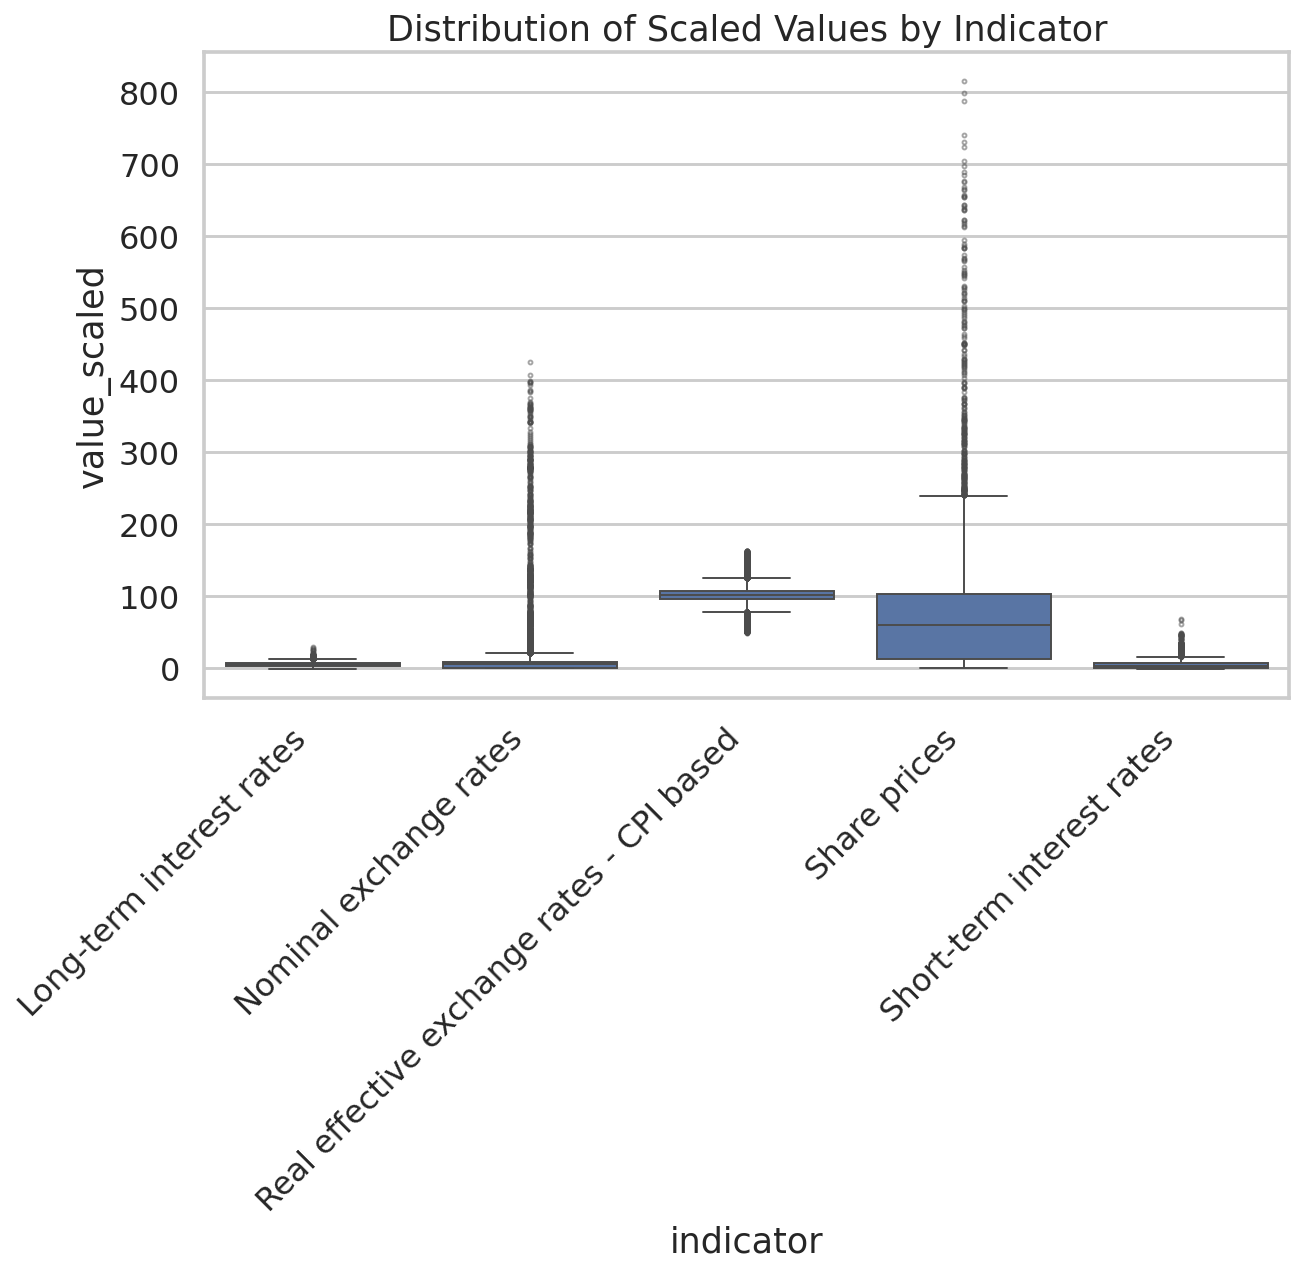

In [174]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=clean_df,
    x="indicator",
    y="value_scaled",
    flierprops=dict(marker='o', markersize=2, alpha=0.5)
)

plt.title("Distribution of Scaled Values by Indicator")
plt.xticks(rotation=45, ha='right')
plt.show()

###2.2.4 Correlations

As one of the most important sections, for correlations I calculated and visualized the six main economic indicators to see how they move together over time. I first reshaped the data so that each indicator became a separate column, using the average value across all countries for each month. Then I computed the correlation matrix and rounded it to two decimals. Finally, I plotted a heatmap to clearly show positive and negative relationships between indicators. There were no big surprises in the results.

 Correlation matrix between indicators:


indicator                                  Long-term interest rates  \
indicator                                                             
Long-term interest rates                                       1.00   
Nominal exchange rates                                        -0.66   
Real effective exchange rates - CPI based                      0.34   
Share prices                                                  -0.67   
Short-term interest rates                                      0.92   

indicator                                  Nominal exchange rates  \
indicator                                                           
Long-term interest rates                                    -0.66   
Nominal exchange rates                                       1.00   
Real effective exchange rates - CPI based                   -0.38   
Share prices                                                 0.90   
Short-term interest rates                                   -0.52   

indicator                                  Real effective exchange rates - CPI based  \
indicator                                                                              
Long-term interest rates                                                        0.34   
Nominal exchange rates                                                         -0.38   
Real effective exchange rates - CPI based                                       1.00   
Share prices                                                                   -0.16   
Short-term interest rates                                                       0.29   

indicator                                  Share prices  \
indicator                                                 
Long-term interest rates                          -0.67   
Nominal exchange rates                             0.90   
Real effective exchange rates - CPI based         -0.16   
Share prices                                       1.00   
Short-term interest rates                         -0.56   

indicator                                  Short-term interest rates  
indicator                                                             
Long-term interest rates                                        0.92  
Nominal exchange rates                                         -0.52  
Real effective exchange rates - CPI based                       0.29  
Share prices                                                   -0.56  
Short-term interest rates                                       1.00

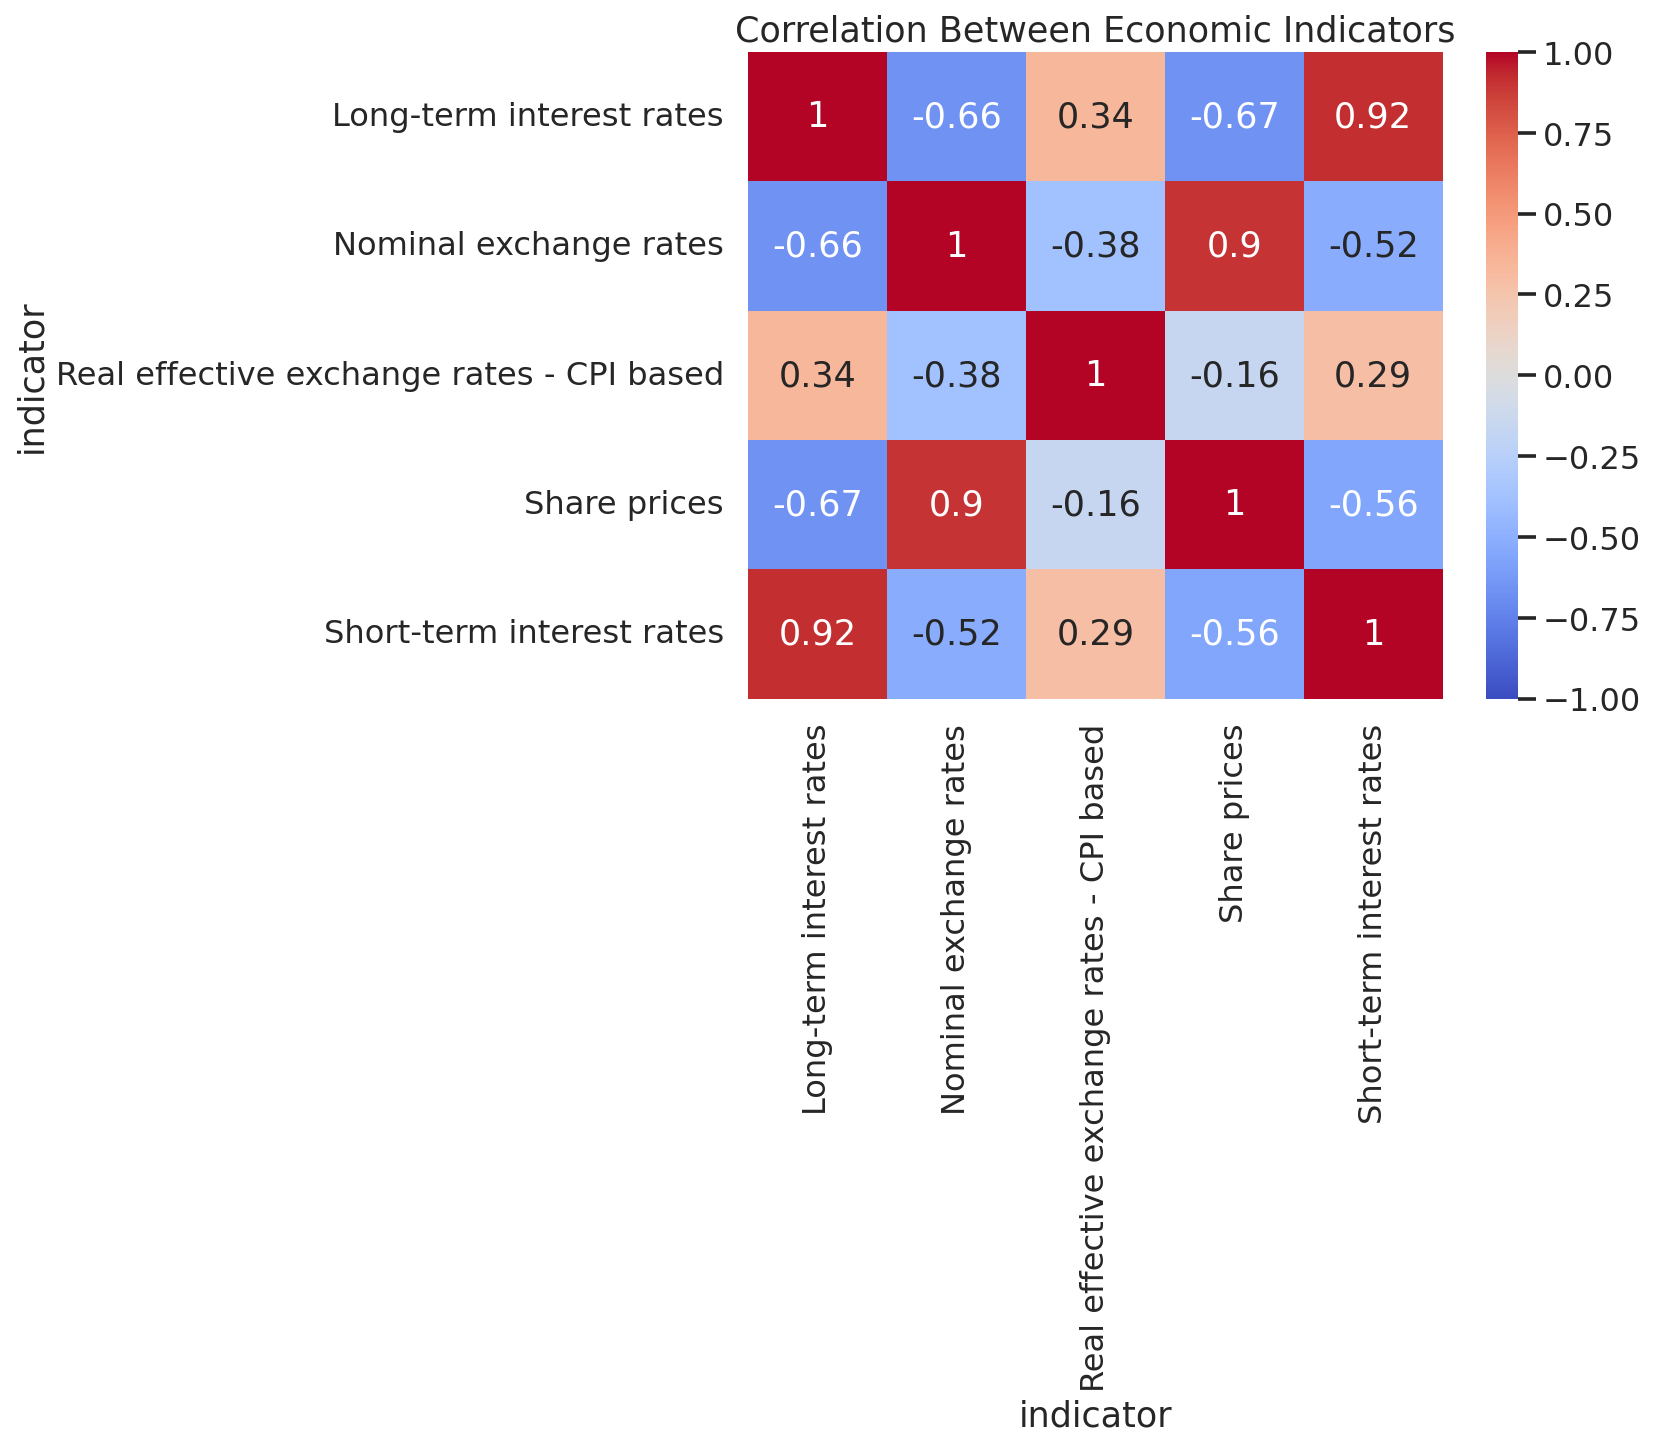

In [175]:
corr_df = (
    clean_df
    .groupby(["date", "indicator"])["value_scaled"]
    .mean()
    .unstack()
)

corr_matrix = corr_df.corr().round(2)

print(" Correlation matrix between indicators:")
display(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Economic Indicators")
plt.show()

##3. Visualization

###3.1 Time Series Trends

To start off the visualization section, I created seperate charts that show the average value of each indicator across all 26 countries. The goal was to see how the group as a whole evolved over time. I grouped the data by date and indicator, calculating the average scaled value for each month to capture the general economic trend rather than individual country movements. Then, I used line plots to show how the six indicators change throughout the years, which makes it easy to spot long-term patterns, like the a decline in interest rates and the rise in share prices. It’s important to note that the value axis's represent all the different measurement units depending on the indicator, as explained earlier in the Introduction section.

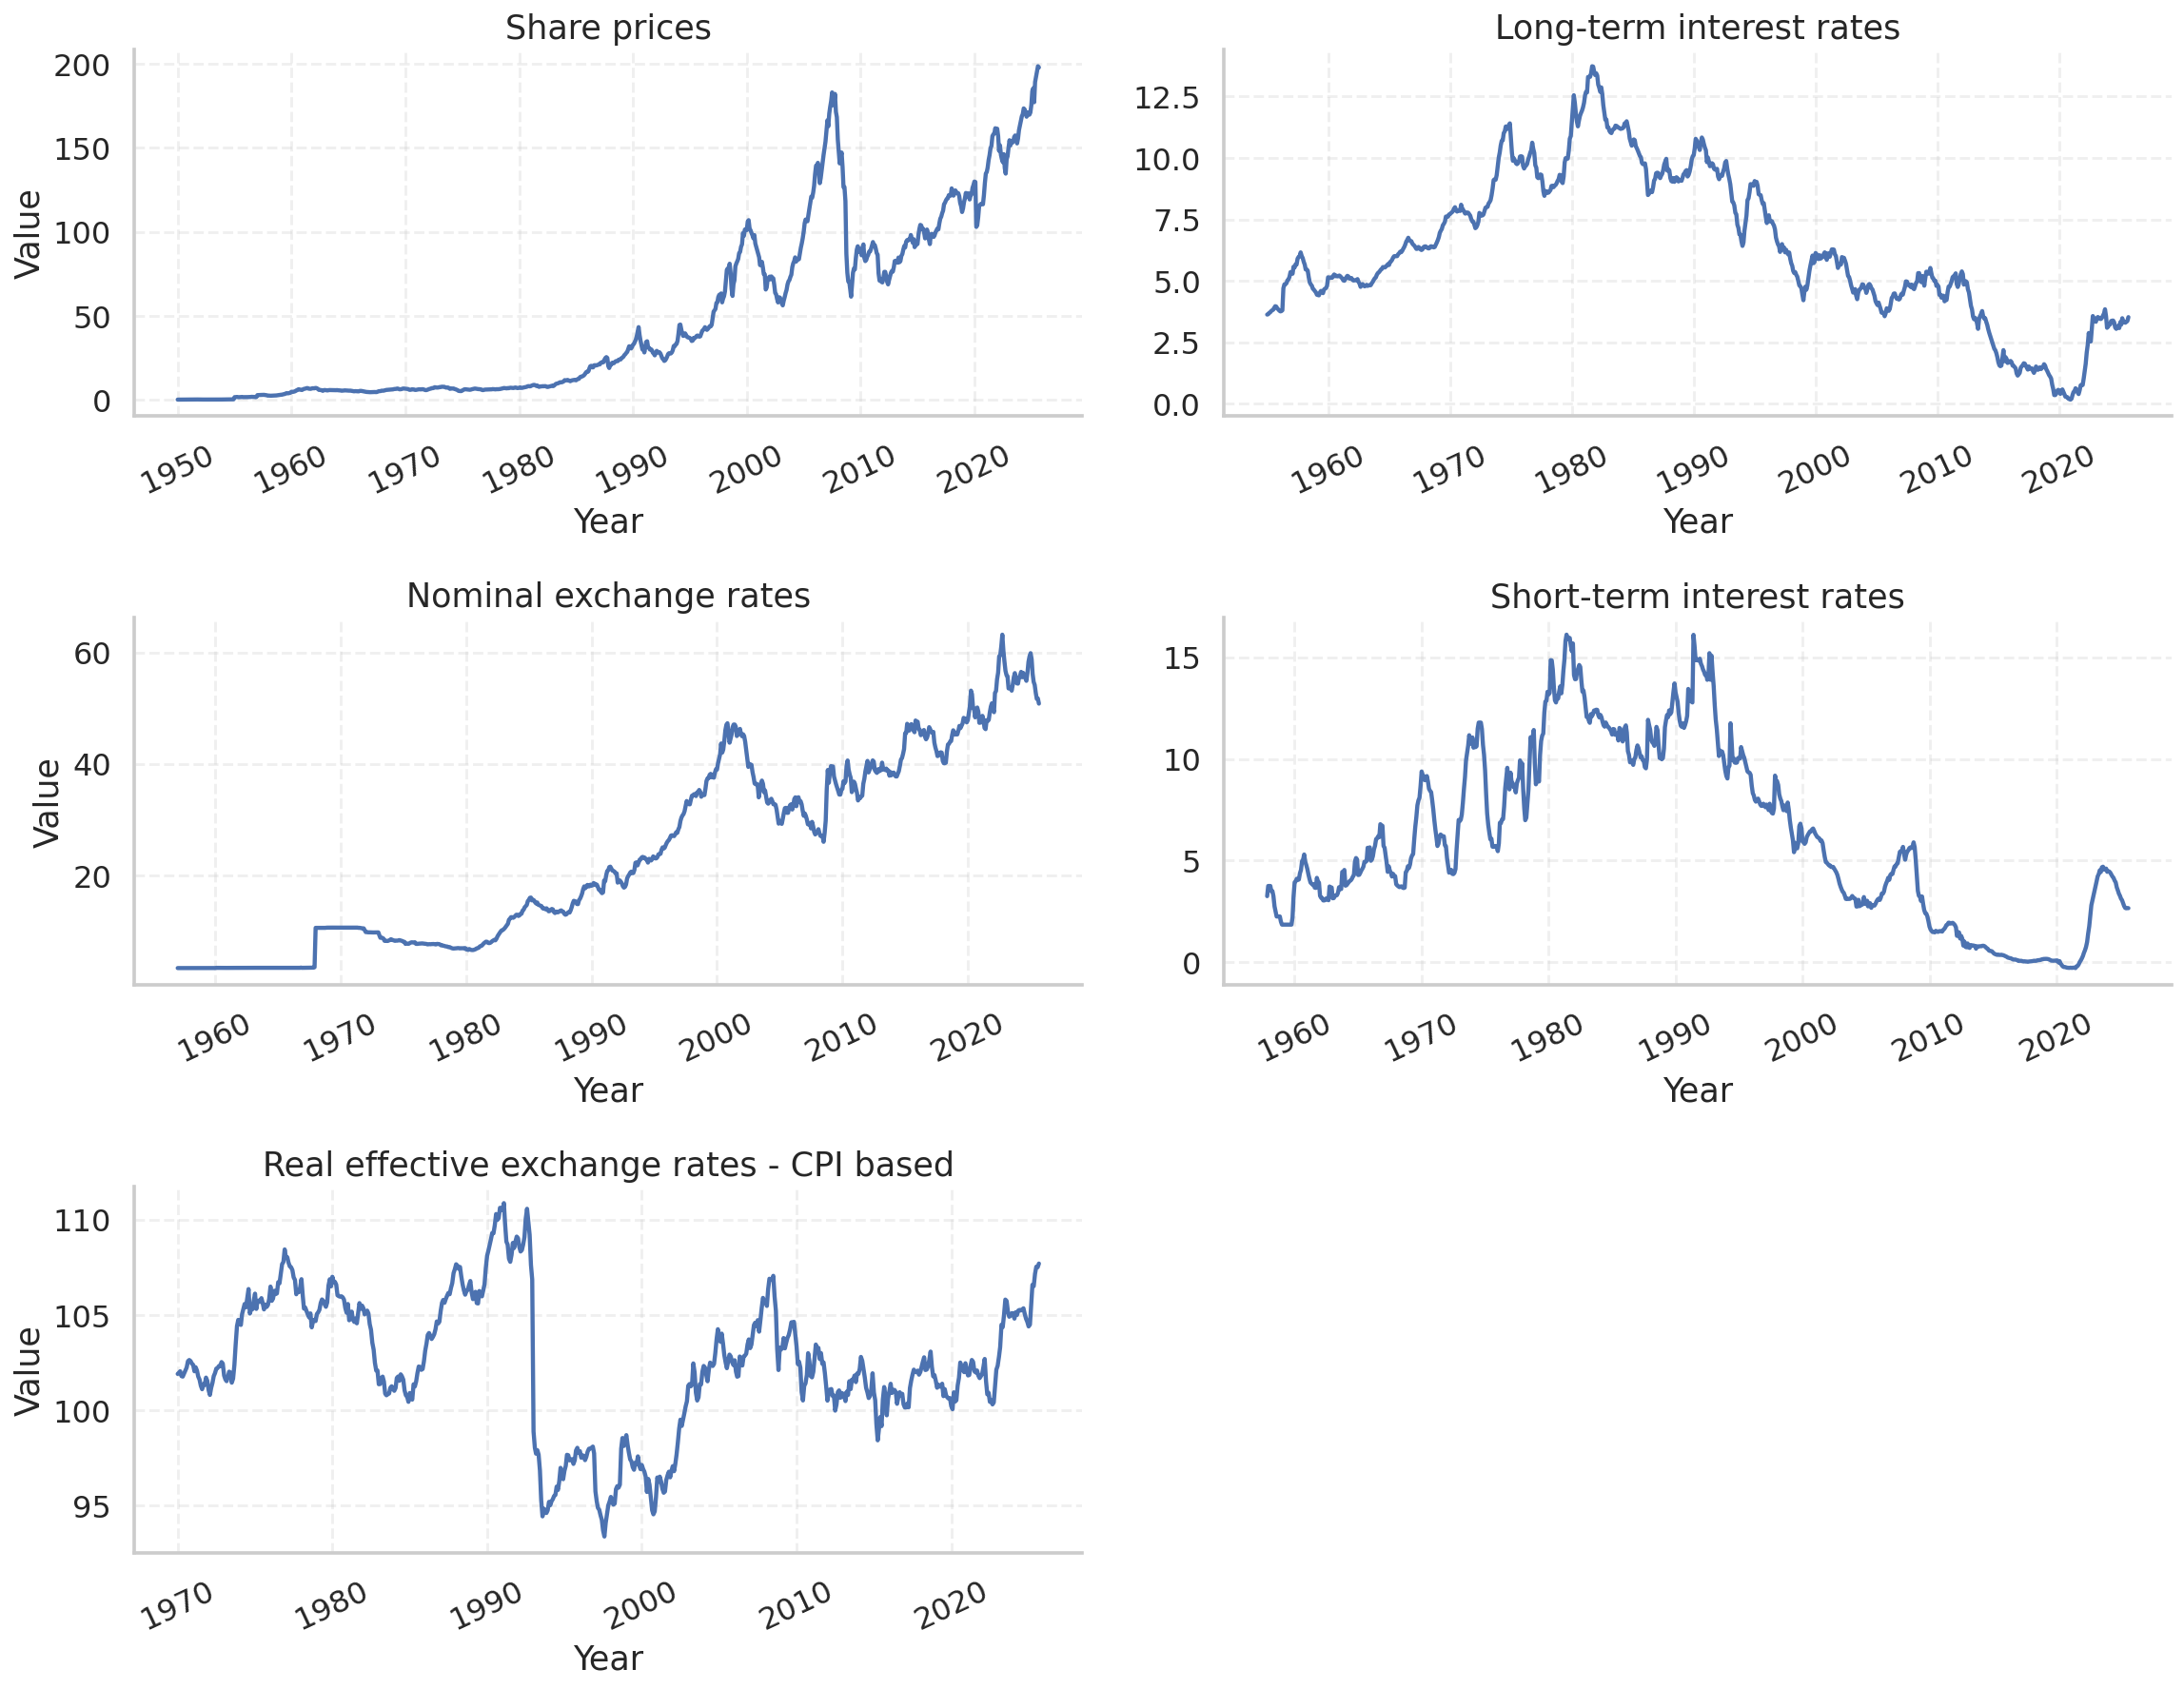

In [176]:
sns.set_theme(context="talk", style="whitegrid")

avg_over_time["date"] = pd.to_datetime(avg_over_time["date"])

g = sns.FacetGrid(
    avg_over_time,
    col="indicator",
    col_wrap=2,
    sharex=False,
    sharey=False,
    height=5.2,
    aspect=1.6,
    margin_titles=True
)

g.map_dataframe(sns.lineplot, x="date", y="value_scaled")
g.set_titles("{col_name}")
g.set_xlabels("Year")
g.set_ylabels("Value")

for ax in g.axes.ravel():
    ax.tick_params(axis="x", labelrotation=25)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    ax.grid(True, which='major', axis='both', linestyle='--', alpha=0.3)

g.fig.subplots_adjust(
    top=0.93,
    wspace=0.15,
    hspace=0.55
)

g.fig.set_size_inches(17, 13)
plt.rcParams["figure.dpi"] = 140

plt.show()


###3.2 Cross-Country Comparison


After visualizing the group average for all indicators, this section breaks down each indicator individually across all 26 countries. At first glance, the graphs might look chaotic and intimidating, but taking a closer look reveals valuable information about volatility, convergence, and trend shifts. To compare each indicator across countries, I plotted one chart per indicator, showing how its values change over time for all 26 countries. Each line represents a country, and I applied a custom color palette to make them easier to distinguish.

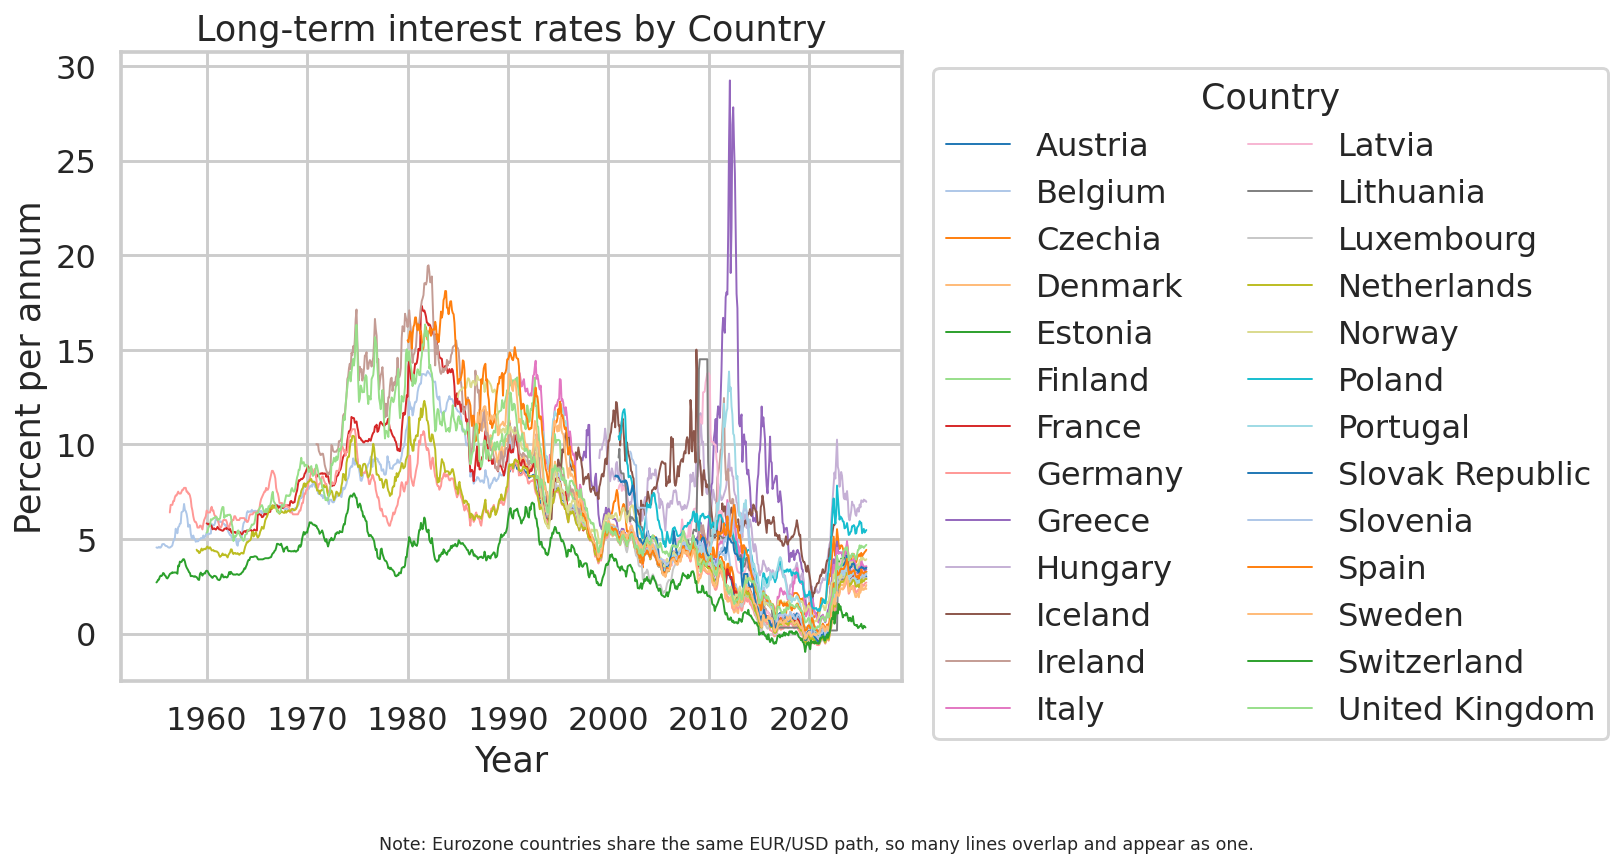

/tmp/ipython-input-568135045.py:10: UserWarning: The palette list has more values (26) than needed (10), which may not be intended.
  sns.lineplot(


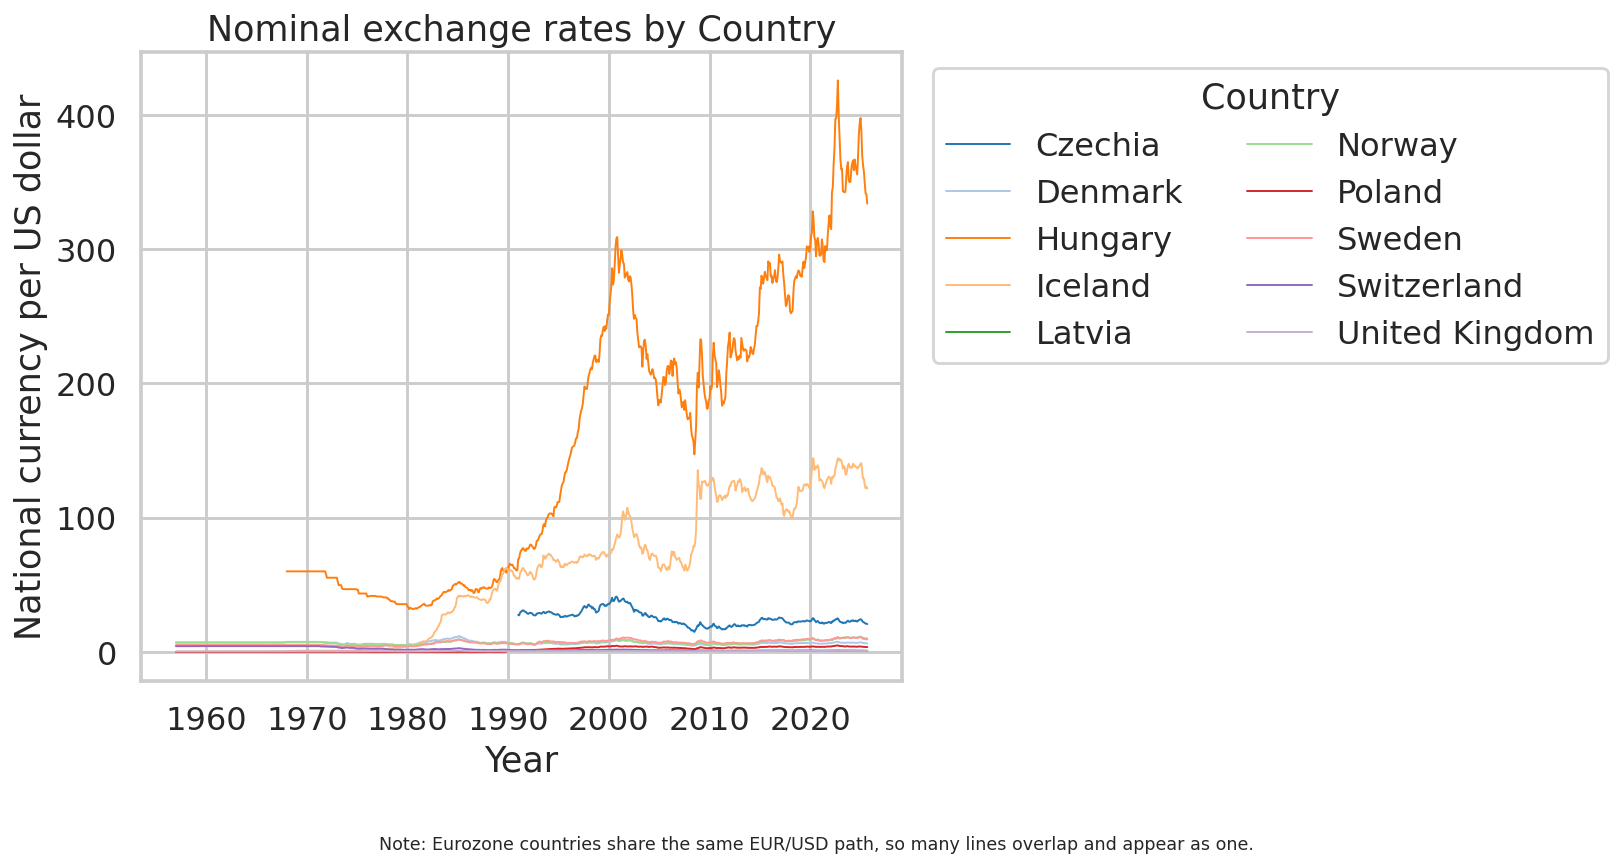

/tmp/ipython-input-568135045.py:10: UserWarning: The palette list has more values (26) than needed (25), which may not be intended.
  sns.lineplot(


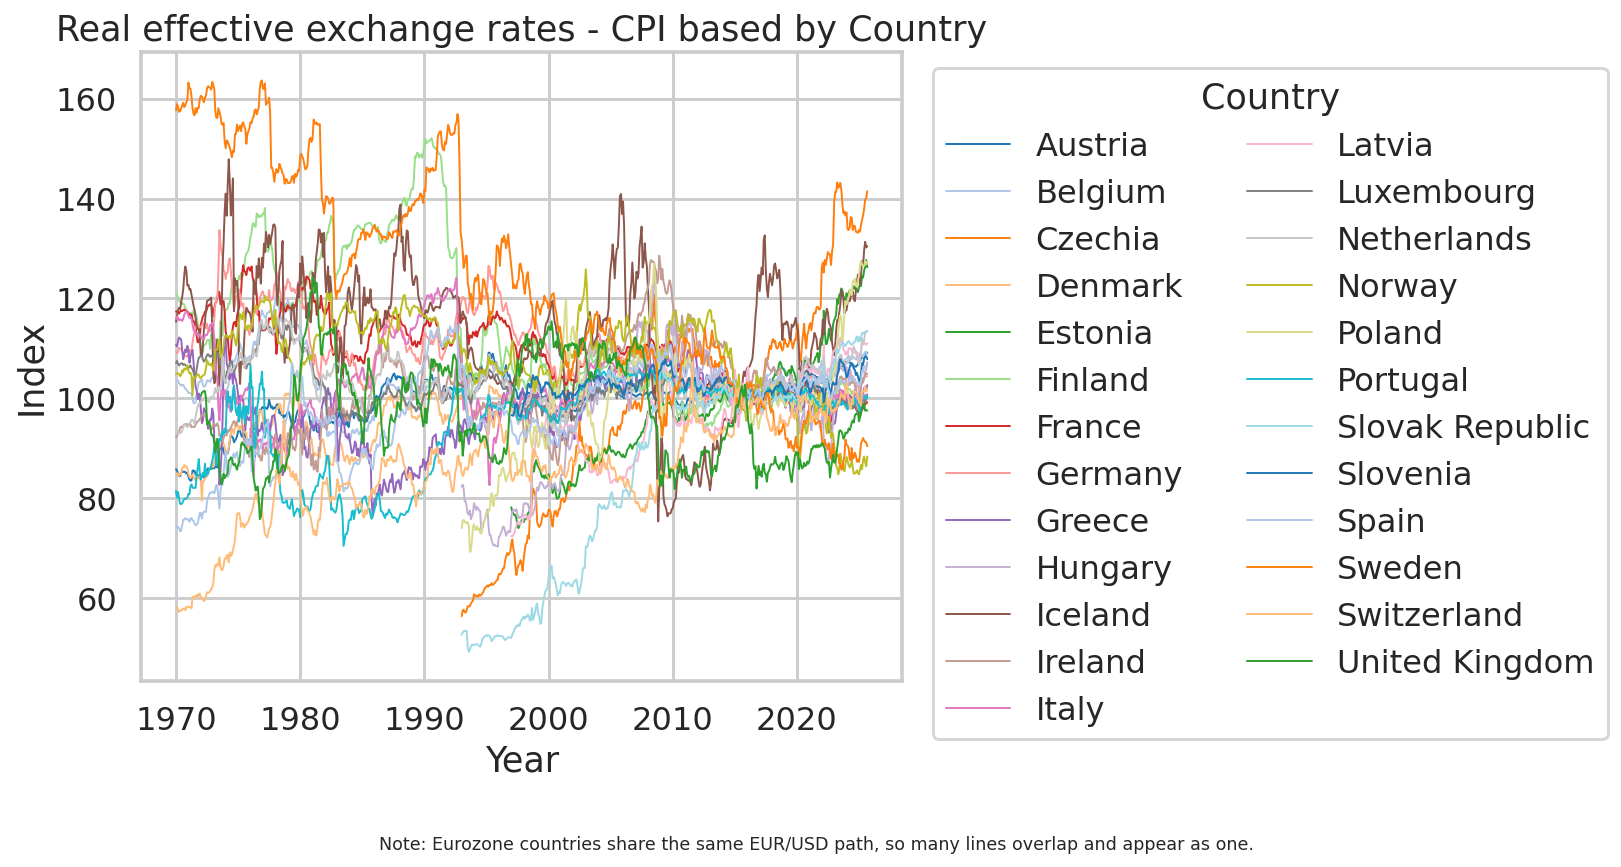

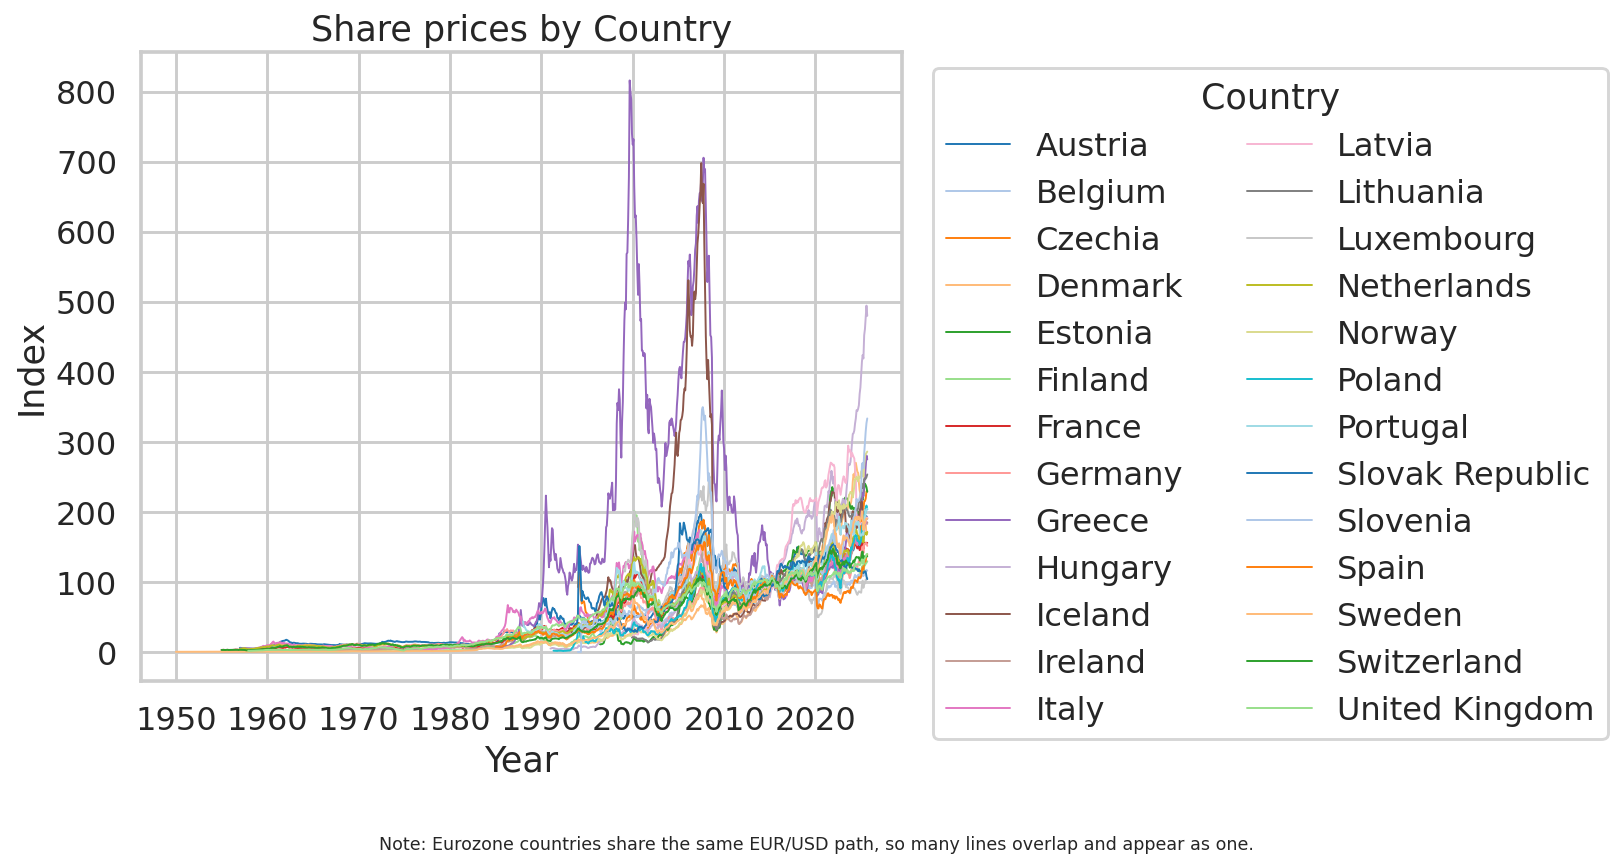

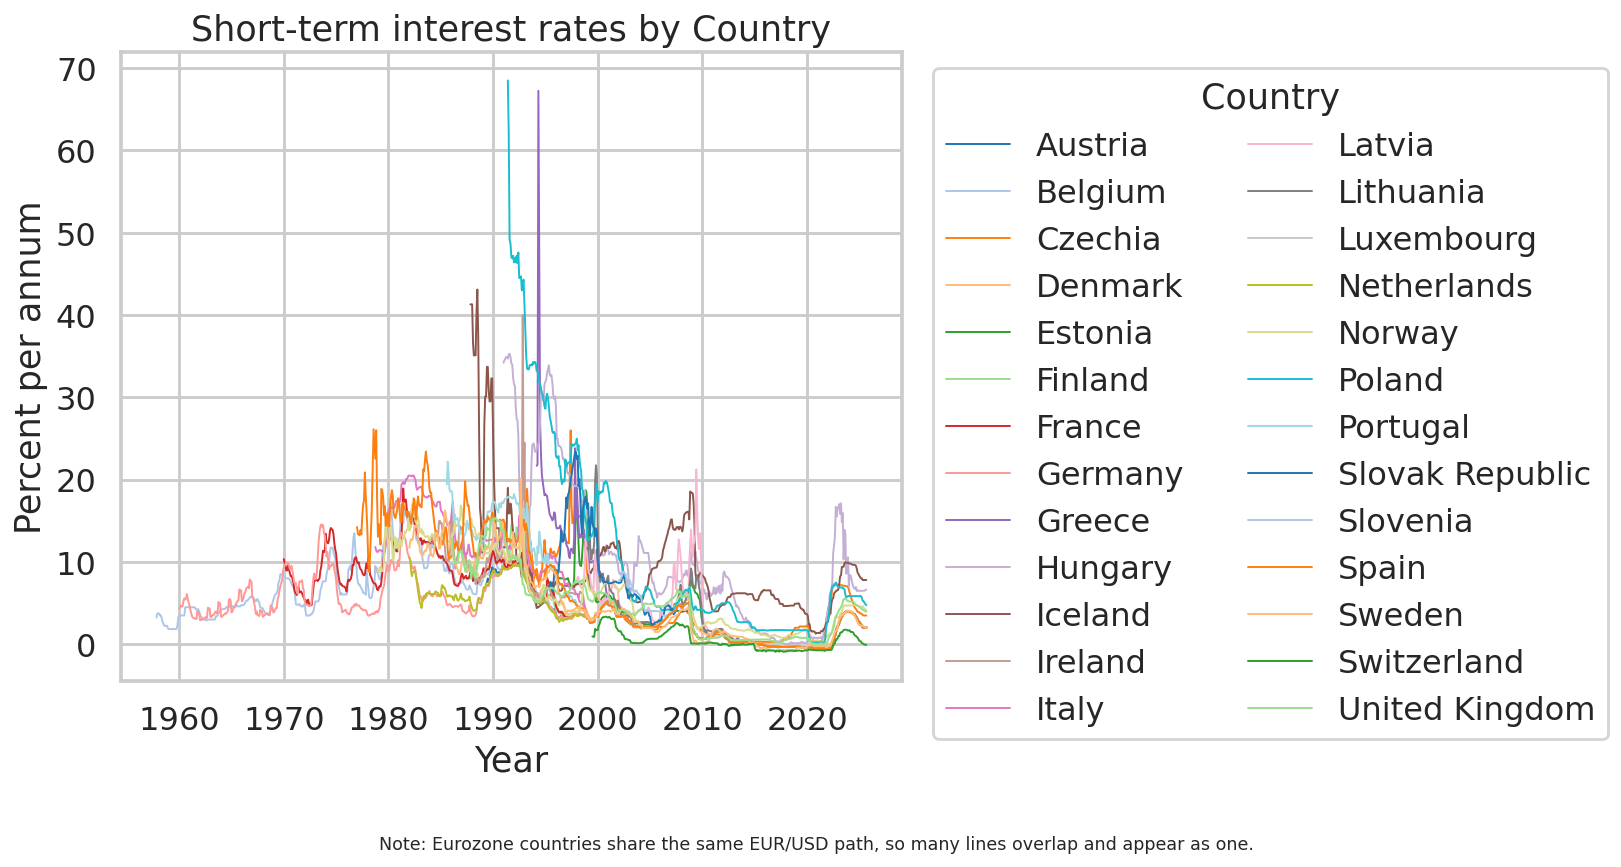

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("tab20", n_colors=26)

for indicator_name in clean_df["indicator"].unique():
    subset = clean_df[clean_df["indicator"] == indicator_name]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=subset,
        x="date",
        y="value_scaled",
        hue="country",
        linewidth=1,
        palette=palette
    )
    plt.title(f"{indicator_name} by Country")
    plt.xlabel("Year")
    plt.ylabel(subset["measurement"].iloc[0])  # automatically sets correct unit on Y-axis
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", ncol=2, title="Country")
    plt.figtext(0.5, -0.04,
            "Note: Eurozone countries share the same EUR/USD path, so many lines overlap and appear as one.",
            ha="center", fontsize=9)
    plt.tight_layout()
    plt.show()

###3.3 Distribution of Indicators

To dive deeper into the data, I used a boxplot to visualize the distribution of values for each indicator. This is pretty similar to the 2.2.3 Value Distributions step, since both show how the values are spread out. The main difference here is the idea of getting a quick sense of how each indicator’s data is distributed, whether it’s tightly clustered or more spread out, and where the medians and outliers fall. THis is a way to see the “shape” of the data for a visual understanding.

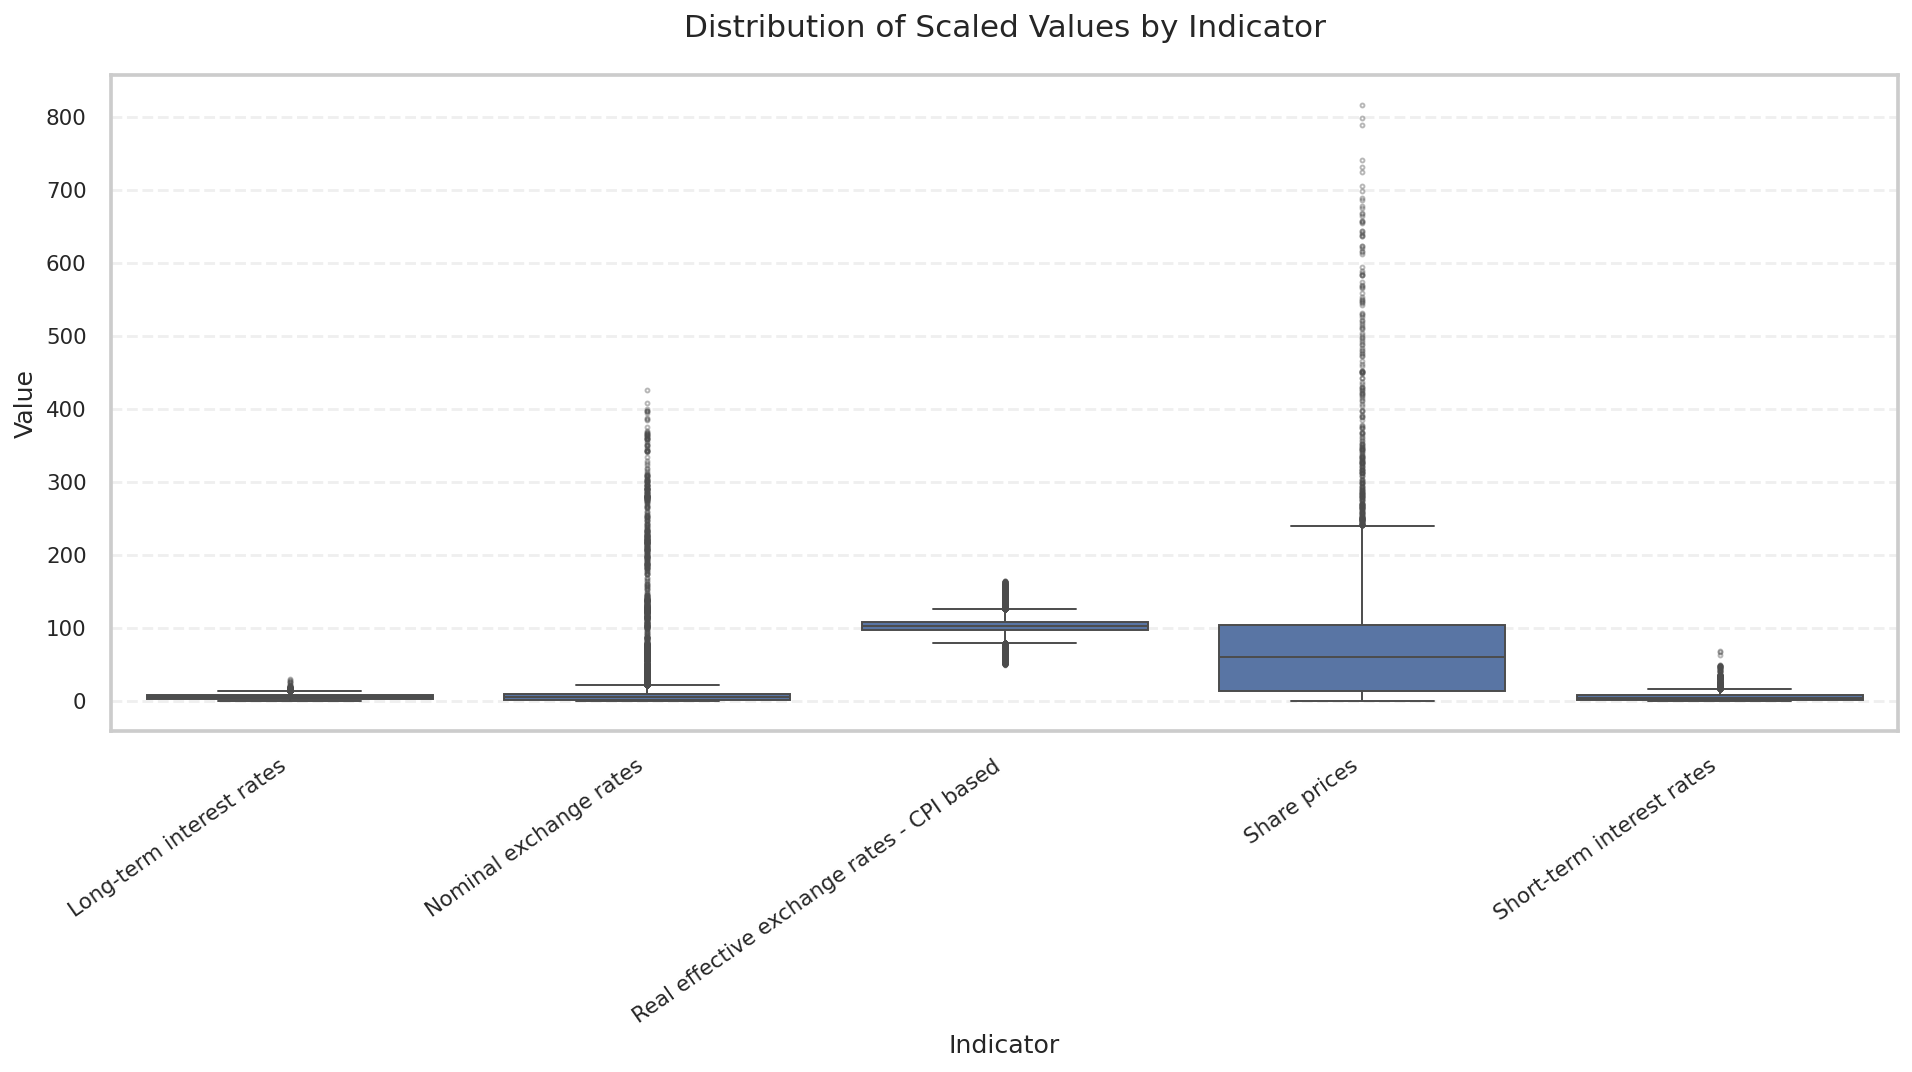

In [178]:
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=clean_df,
    x="indicator",
    y="value_scaled",
    flierprops=dict(marker='o', markersize=2, alpha=0.4)
)

plt.title("Distribution of Scaled Values by Indicator", fontsize=16, pad=20)
plt.xlabel("Indicator", fontsize=13)
plt.ylabel("Value", fontsize=13)

plt.xticks(rotation=35, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.subplots_adjust(bottom=0.25, top=0.9)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

###3.4 Correlation Heatmap

For this part, I created a correlation heatmap that combines all 26 countries by averaging their indicator values for each date. This gives a single, clear view of how the six indicators relate to each other overall. The heatmap makes it easy to identify which variables tend to move together and which move in opposite directions across Europe as a whole.

/tmp/ipython-input-4234705816.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


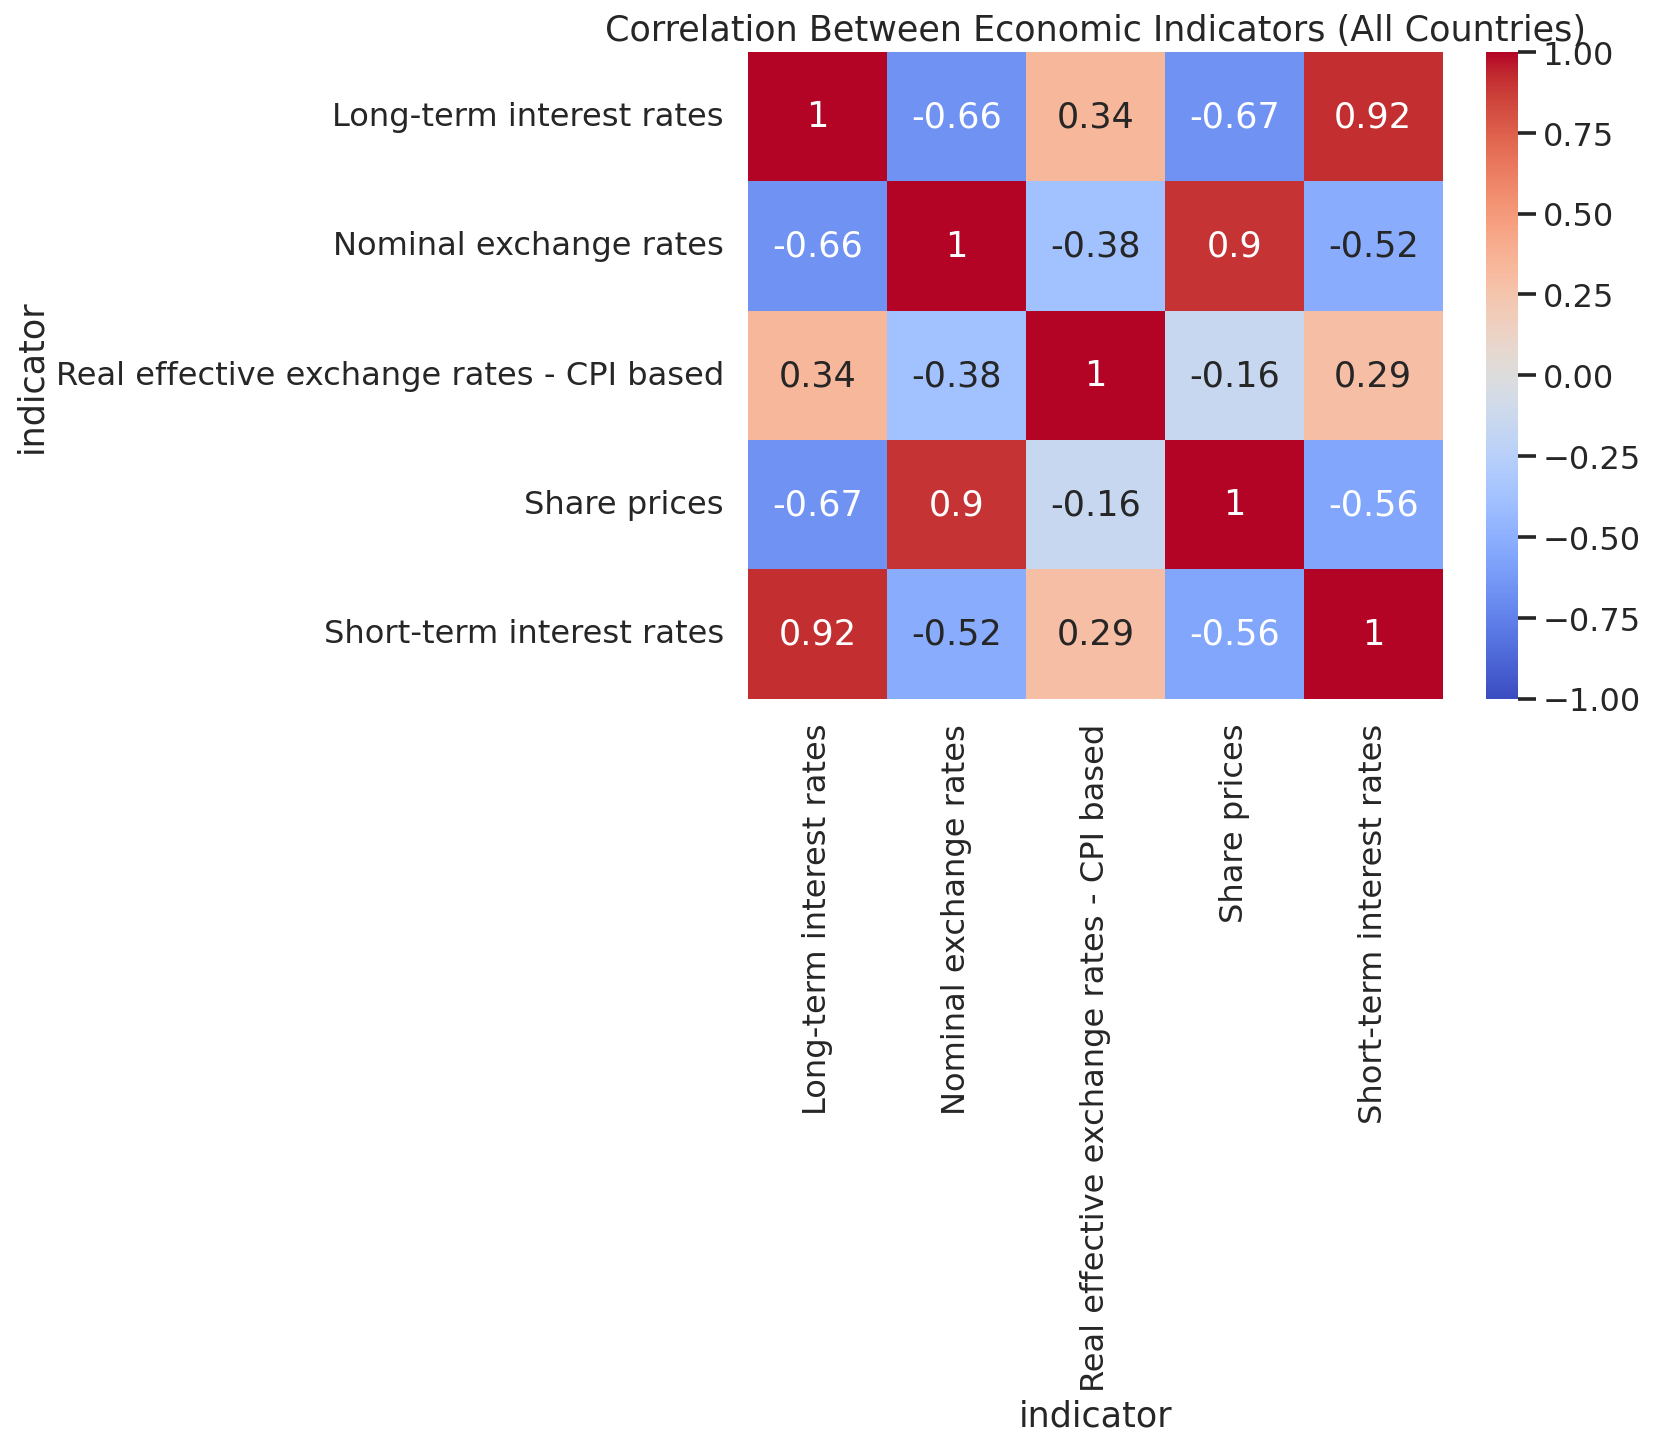

In [179]:
corr_all = (
    clean_df
    .groupby(["date", "indicator"])["value_scaled"]
    .mean()
    .unstack()
    .corr()
)

plt.figure(figsize=(8,6))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Economic Indicators (All Countries)")
plt.tight_layout()
plt.show()

###3.5 Yield Curve Long vs Short-term Interest Rate Spread

To better understand the relationship between long-term and short-term interest rates (one of my personal interests), I calculated the yield curve spread for each country by subtracting short-term rates from long-term rates. This measure helps show whether borrowing costs are higher in the long run or the short run, which often signals market expectations about future growth or recessions. I used the same color palette as in the cross-country comparison to keep country colors consistent across graphs. The resulting plot highlights periods when spreads narrow or turn negative.

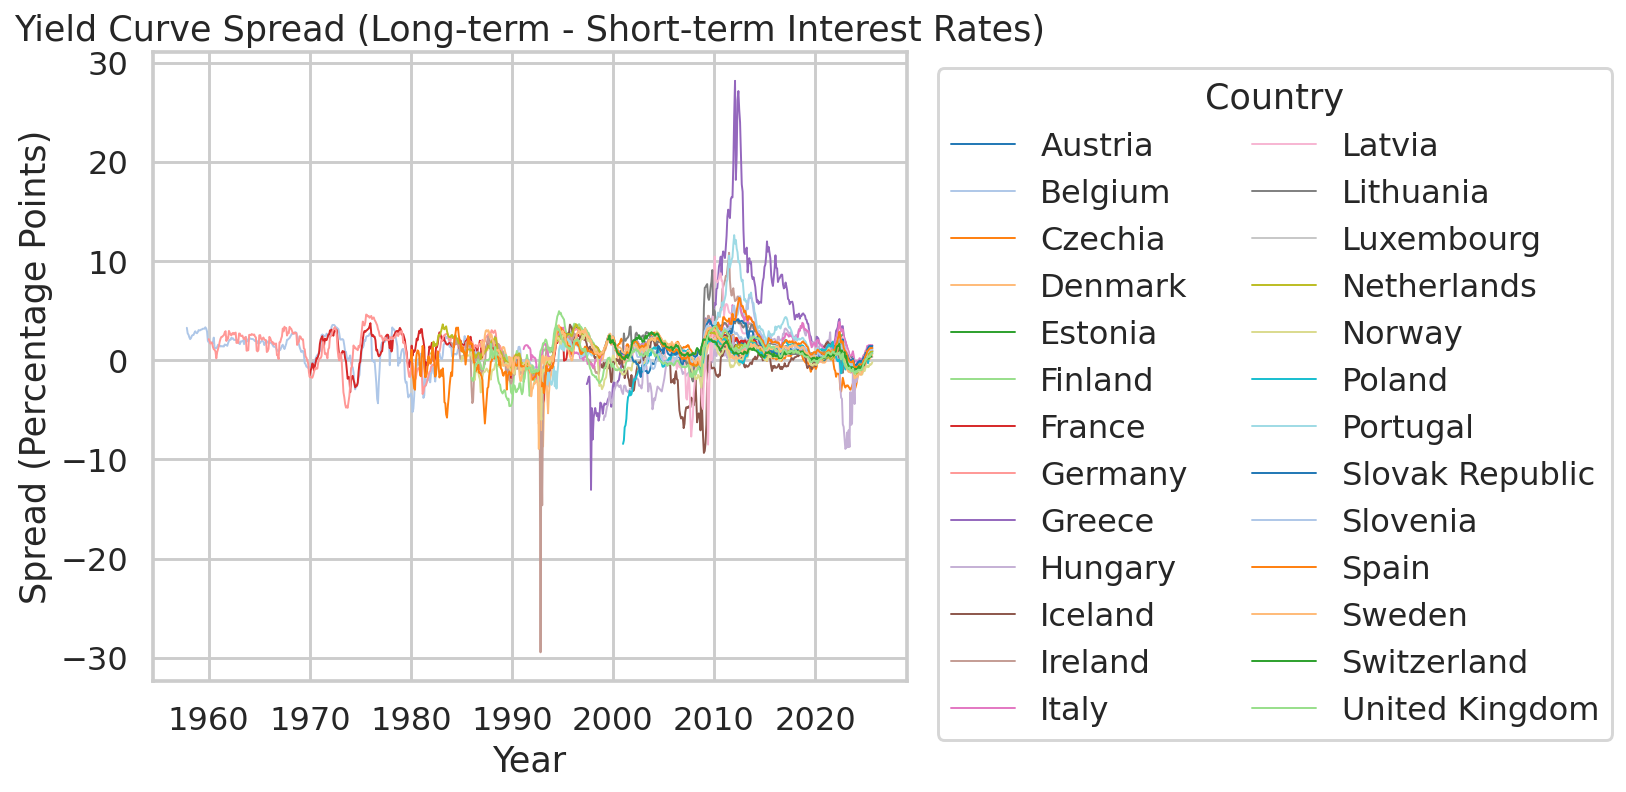

In [180]:
countries_all = sorted(clean_df["country"].unique())
base_palette = sns.color_palette("tab20", n_colors=len(countries_all))
color_map = dict(zip(countries_all, base_palette))

spread_df = (
    clean_df[clean_df["indicator"].isin(["Long-term interest rates", "Short-term interest rates"])]
    .pivot_table(index=["date", "country"], columns="indicator", values="value_scaled")
    .dropna()
)
spread_df["Spread (Long - Short)"] = spread_df["Long-term interest rates"] - spread_df["Short-term interest rates"]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=spread_df.reset_index(),
    x="date",
    y="Spread (Long - Short)",
    hue="country",
    linewidth=1,
    palette=color_map,
    hue_order=countries_all
)

plt.title("Yield Curve Spread (Long-term - Short-term Interest Rates)")
plt.xlabel("Year")
plt.ylabel("Spread (Percentage Points)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", ncol=2, title="Country")
plt.tight_layout()
plt.show()

##4. Simulation or Other Techniques

### 4.1 Rolling Average Trend Simulation

To smooth out short-term fluctuations and highlight longer trends, I used applied a rolling average on the combined dataset of all 26 countries with a 6 month window. This method helps us see the overall direction of each indicator by averaging their, reducing noise. It makes the line less jumpy, allowing the main economic trend to stand out more clearly. The code first groups all countries together by date and indicator, calculates the monthly average, and then applies a six-month rolling mean for each indicator separately. This gives a clearer, more stable view of how each economic measure evolves over time across Europe.

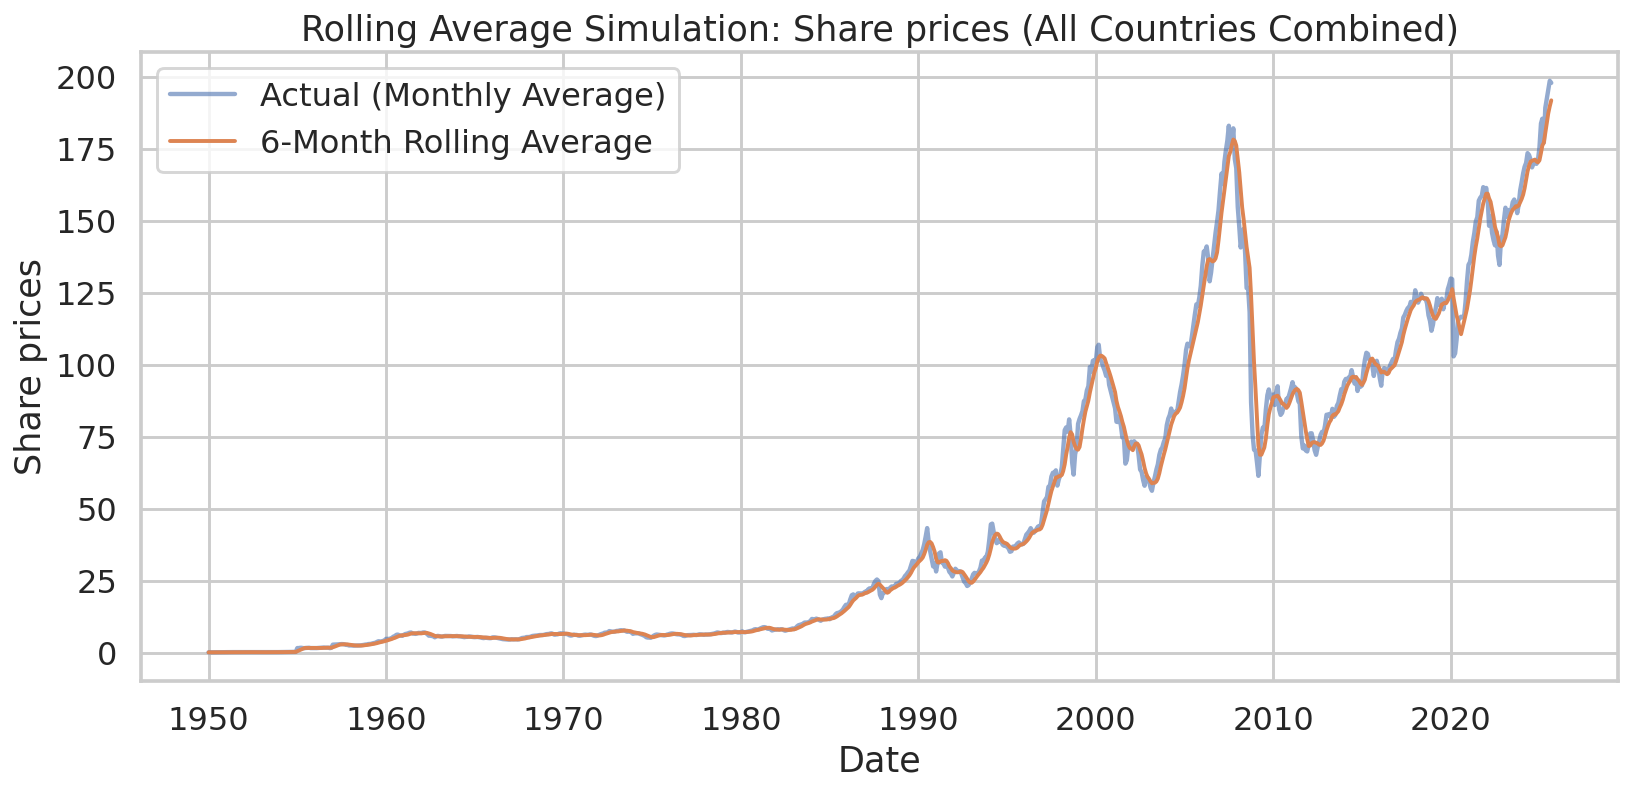

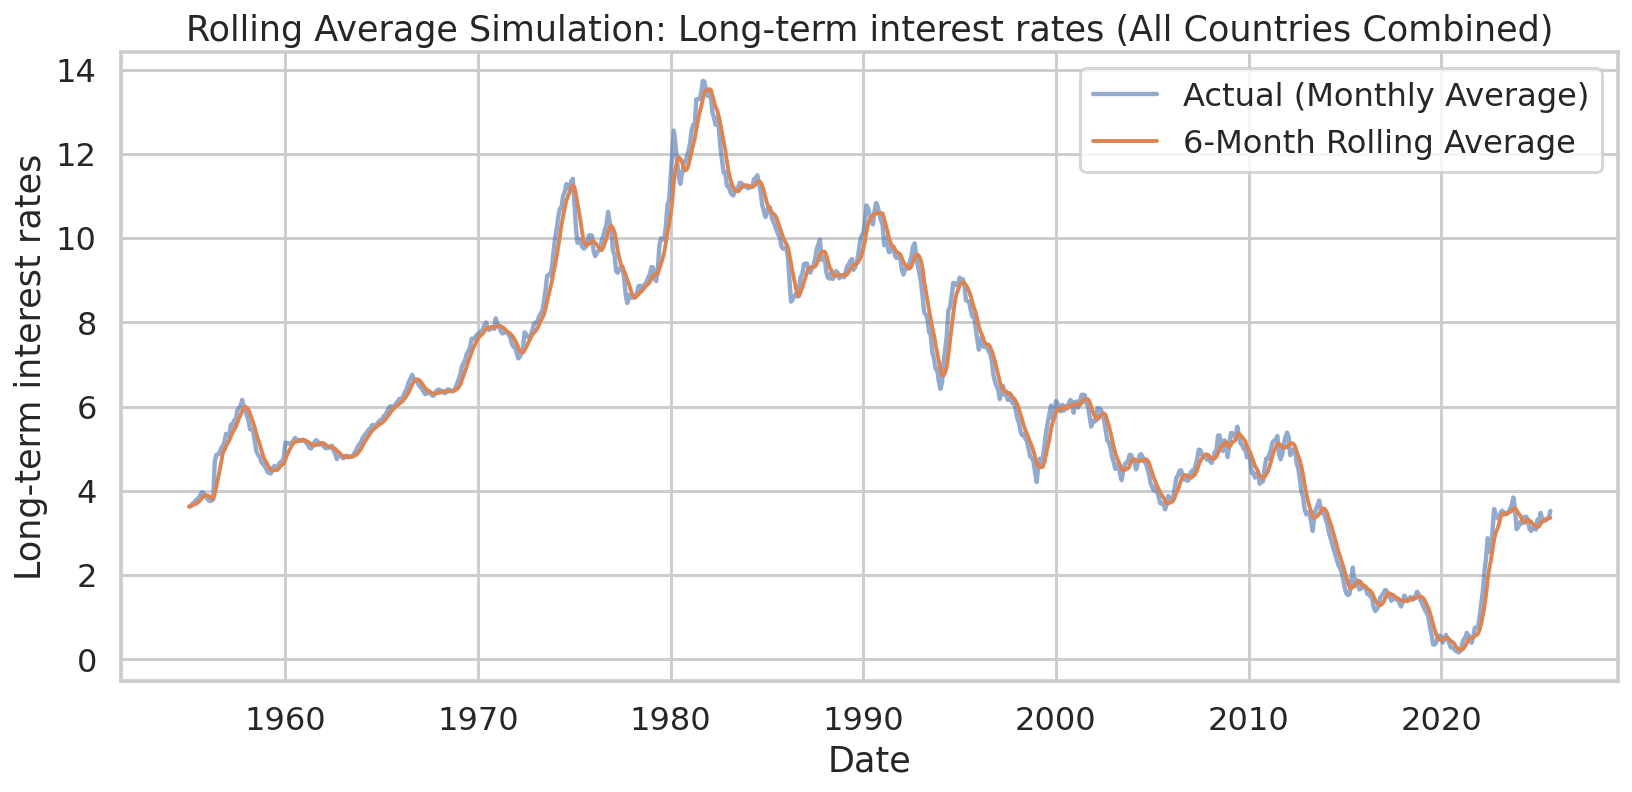

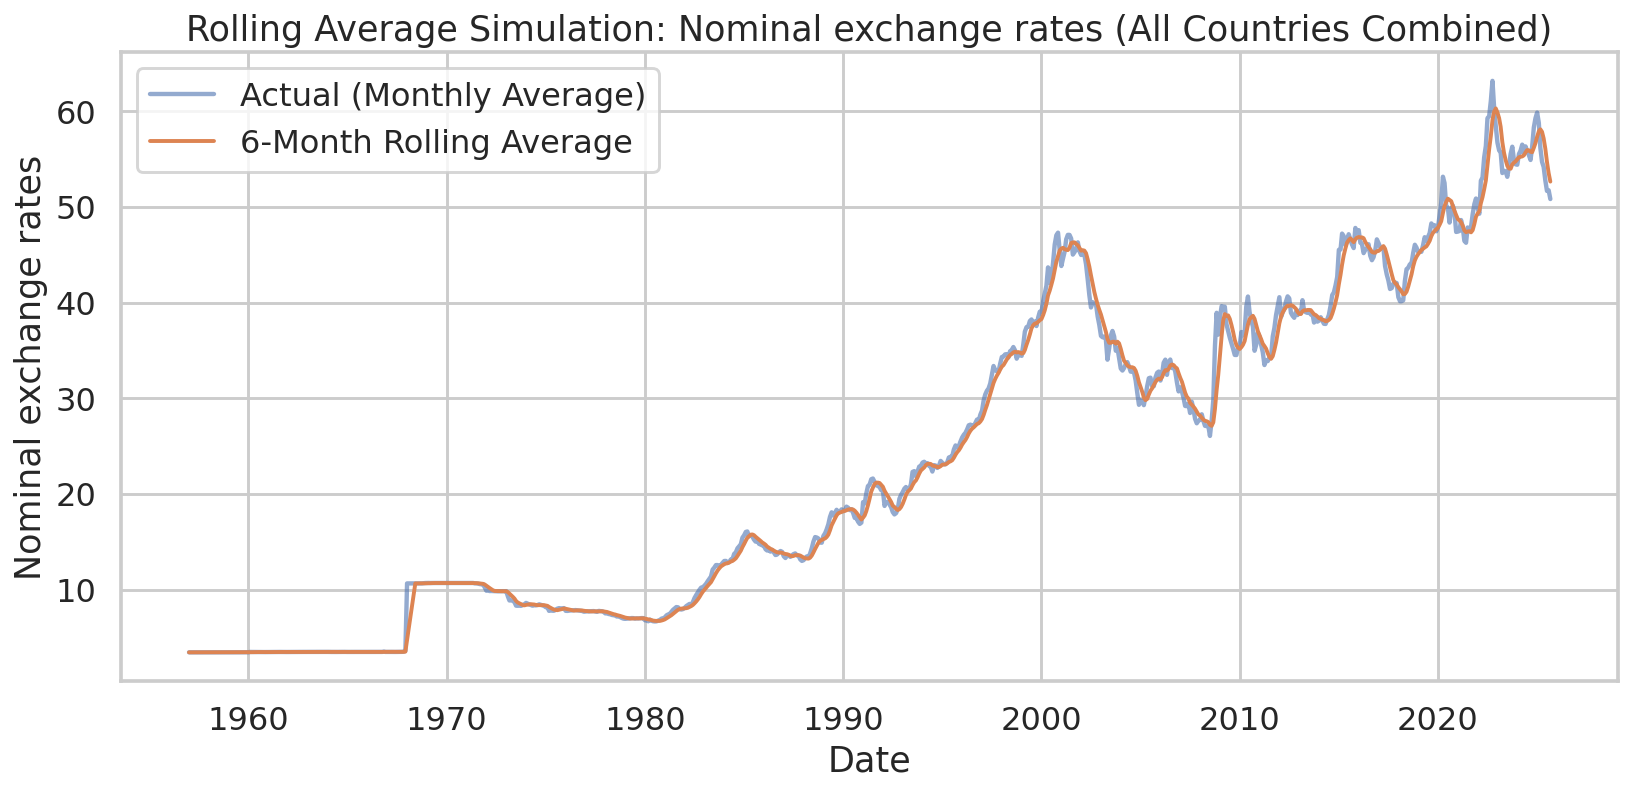

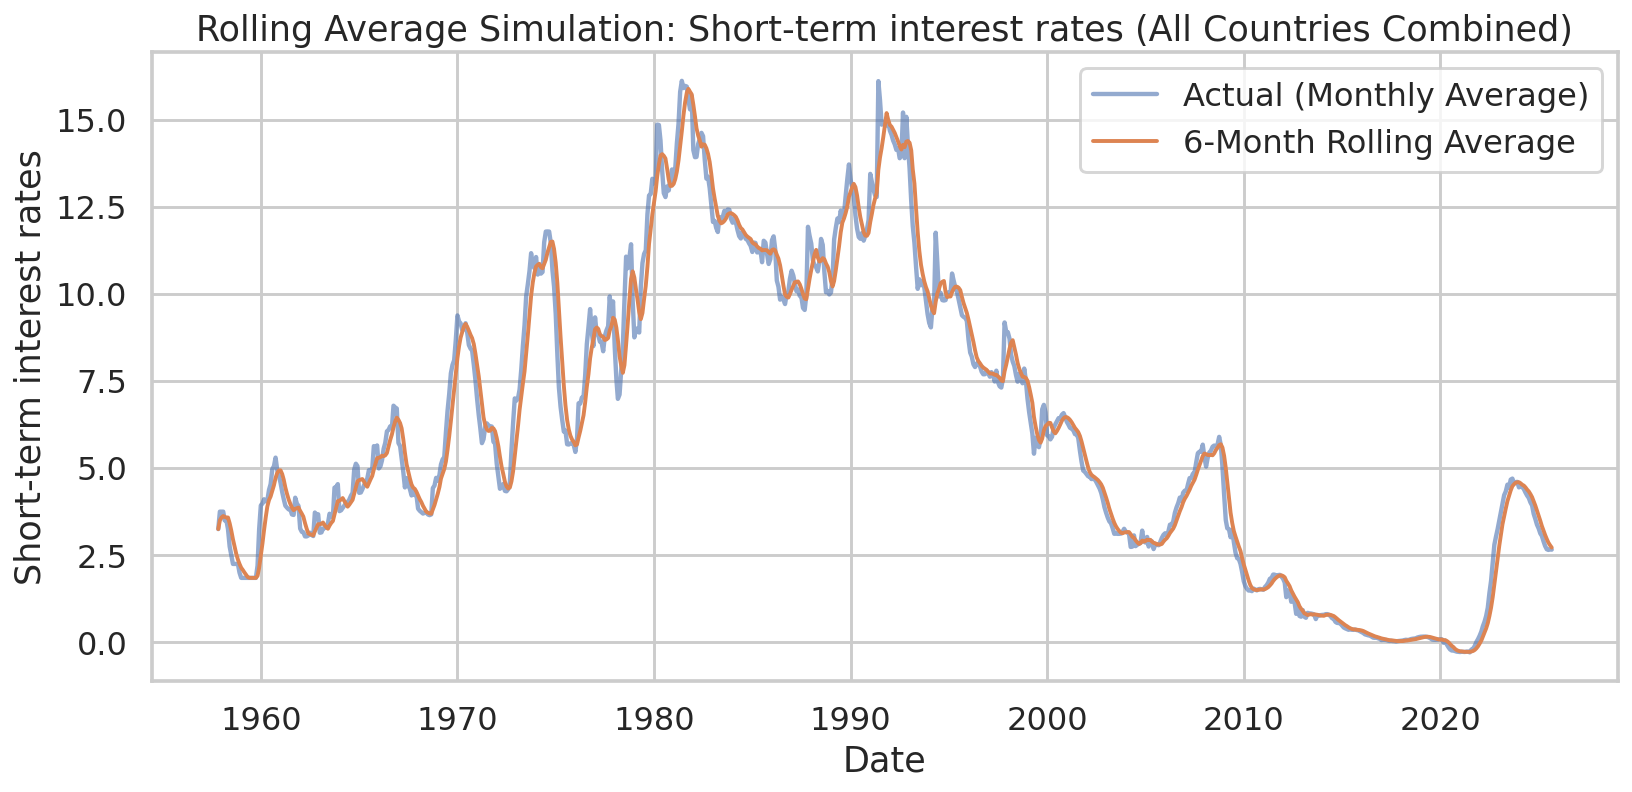

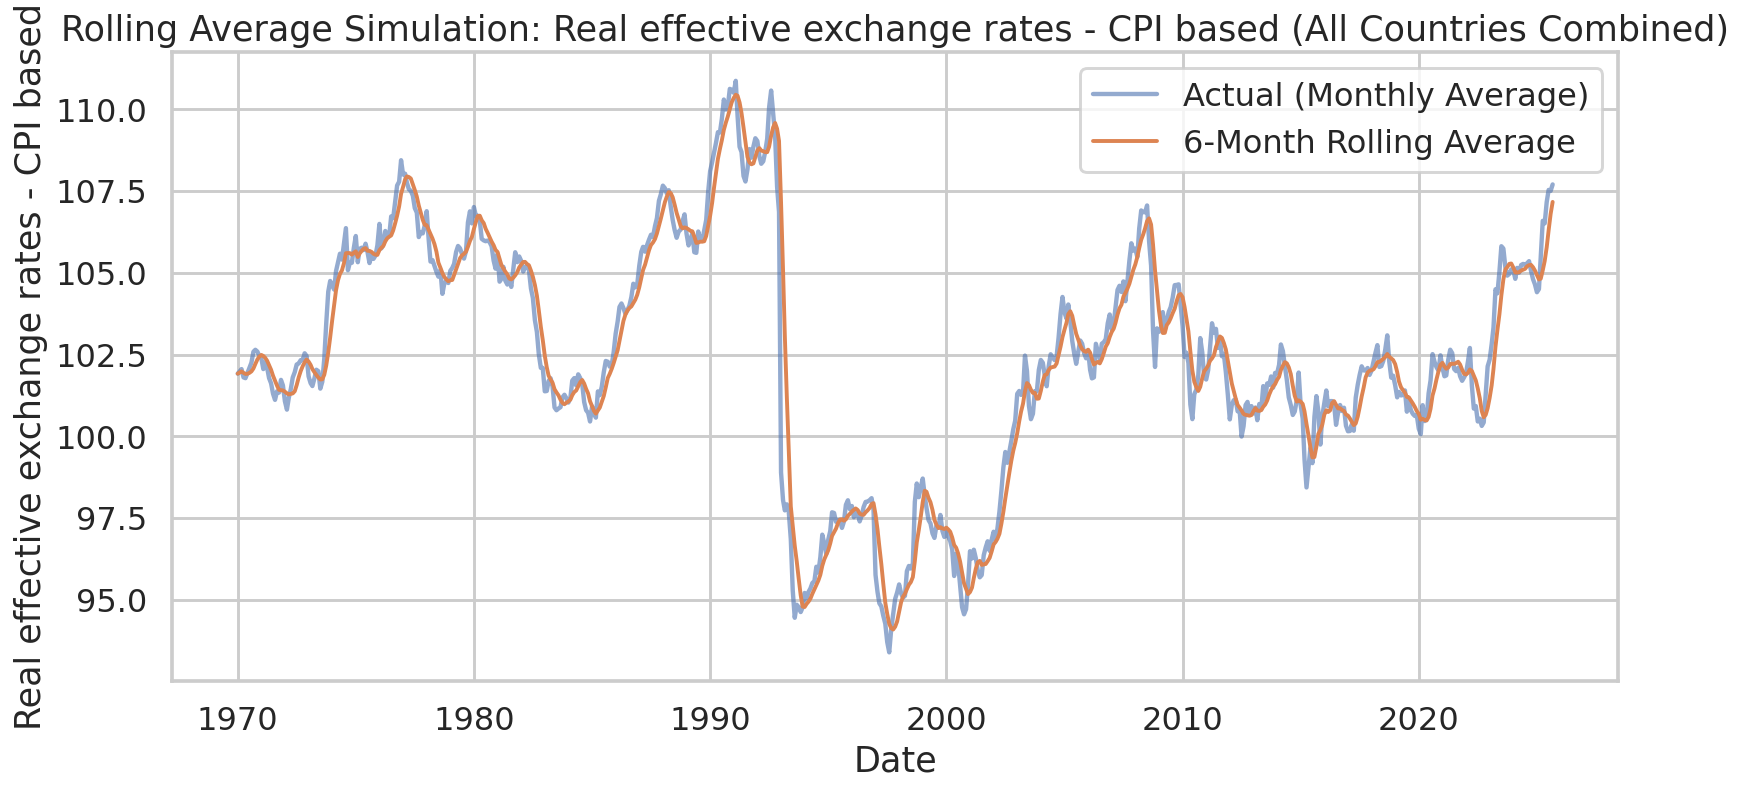

In [181]:
avg_df = (
    clean_df.groupby(["date", "indicator"])["value_scaled"]
    .mean()
    .reset_index()
)

avg_df["rolling_mean"] = (
    avg_df.groupby("indicator")["value_scaled"]
    .transform(lambda x: x.rolling(window=6, min_periods=1).mean())
)

for indicator_name in avg_df["indicator"].unique():
    subset = avg_df[avg_df["indicator"] == indicator_name]

    plt.figure(figsize=(12,6))
    plt.plot(subset["date"], subset["value_scaled"], label="Actual (Monthly Average)", alpha=0.6)
    plt.plot(subset["date"], subset["rolling_mean"], label="6-Month Rolling Average", linewidth=2)
    plt.title(f"Rolling Average Simulation: {indicator_name} (All Countries Combined)")
    plt.xlabel("Date")
    plt.ylabel(subset["indicator"].iloc[0])
    plt.legend()
    plt.tight_layout()
    plt.show()

### 4.2 Exponential Smoothing (Holt–Winters)

This is the most exciting part of the project: guessing the future! I was very intrigued by the real predictive power behind this data, so I decided to experiment with simulation models. At first, I tried forecasting with an ARIMA model, but scarce and missing data, and flat results made it an unviable option. I then switched to Holt–Winters’ Exponential Smoothing, which turned out to be a perfect fit since my aggregated European indicators are smooth and show no strong seasonality. This method allowed me to generate cleaner, more realistic forecasts that capture gradual economic trends without overreacting to short-term noise. This model works by giving more weight to recent observations while still considering past values, allowing it to adapt gradually to new trends. In the code, I applied this model to each indicator’s time series to produce forward-looking curves that project their likely direction over the next few years.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


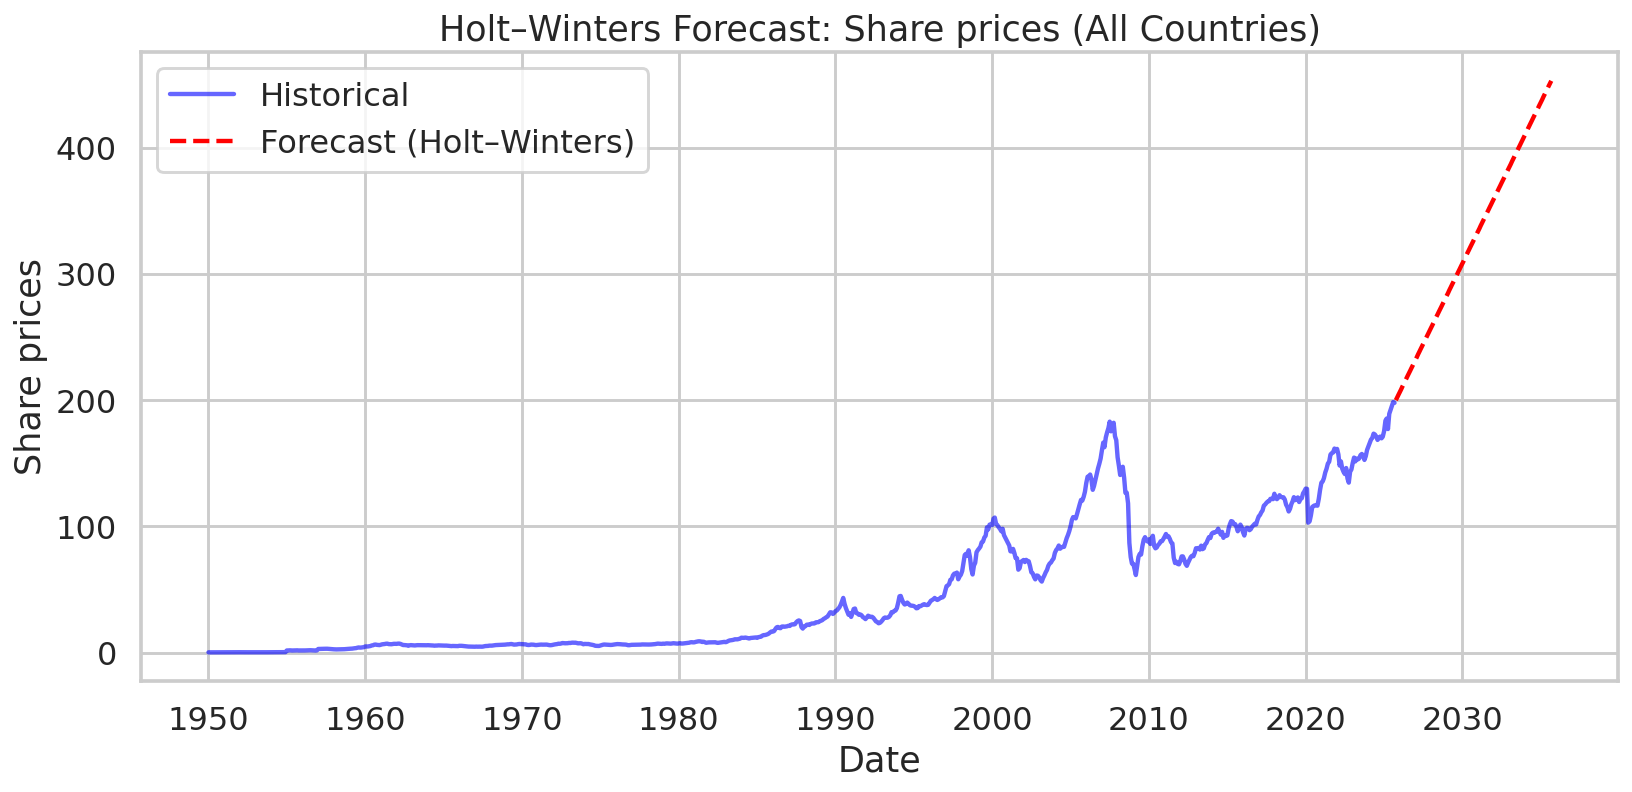

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


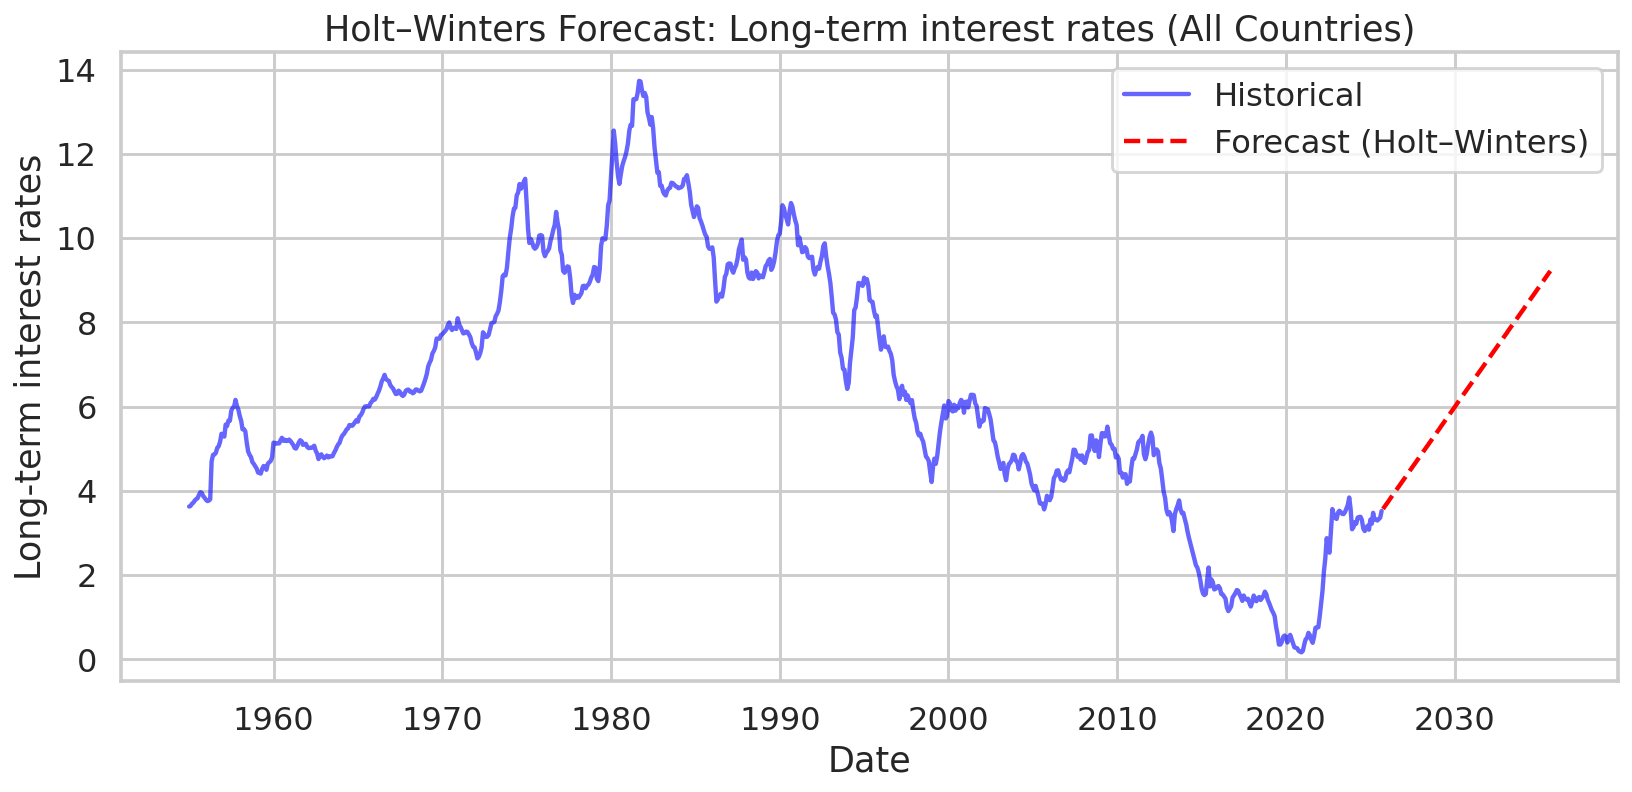

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


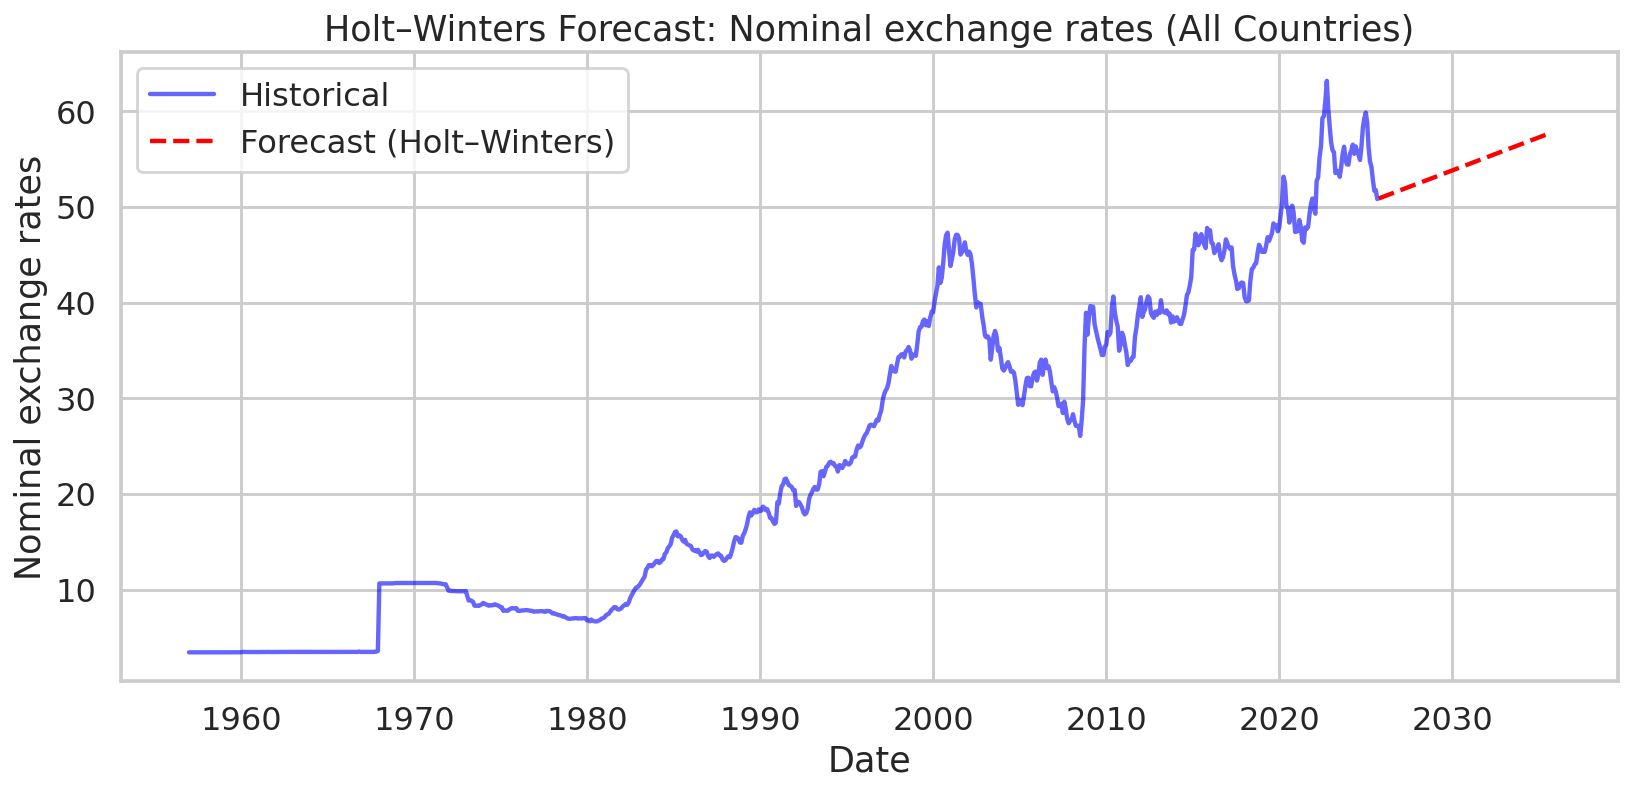

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


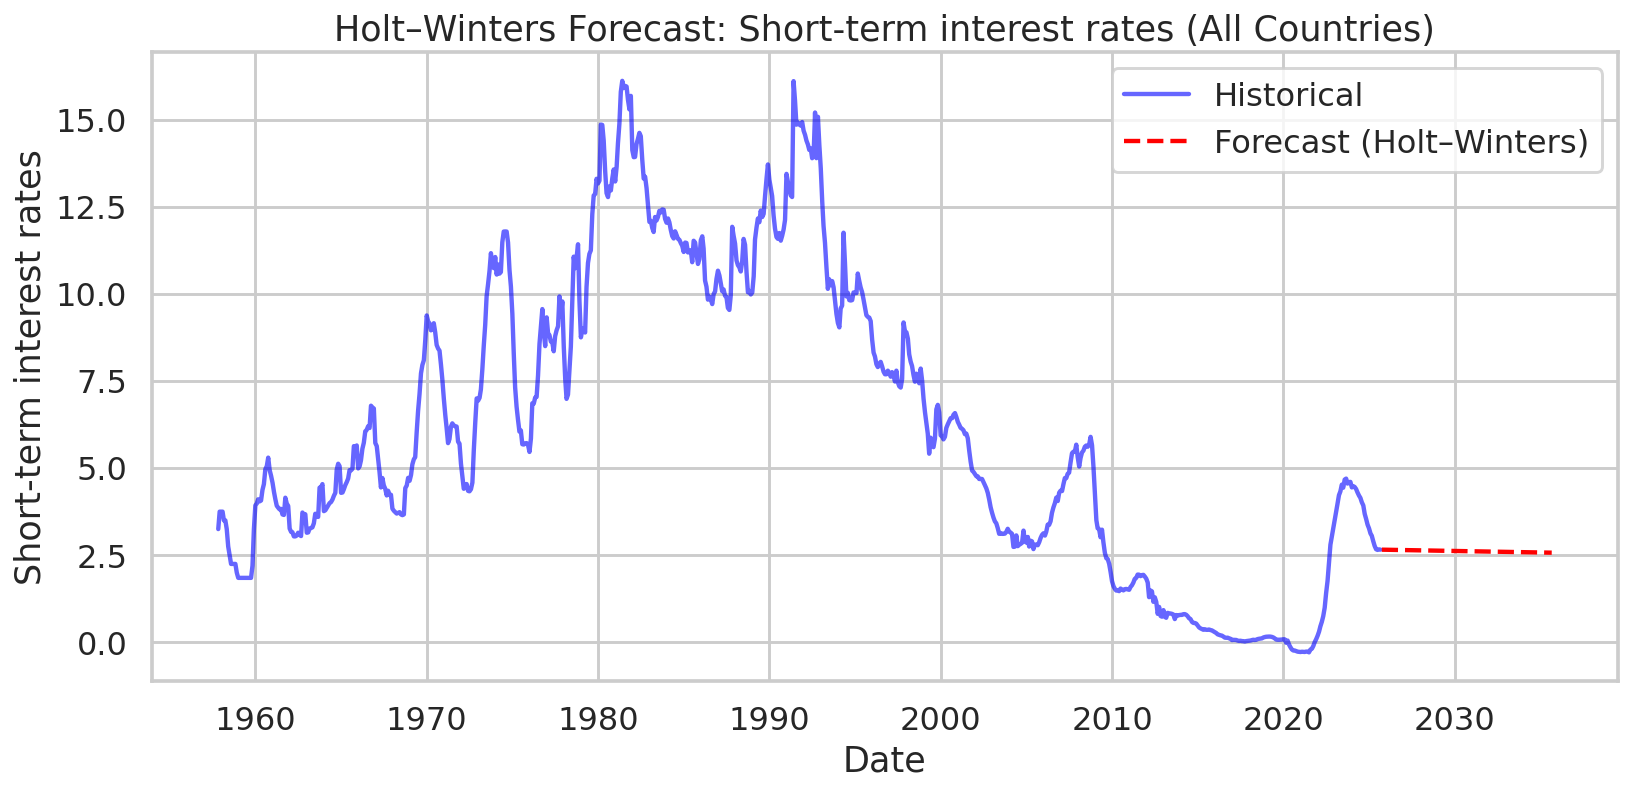

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


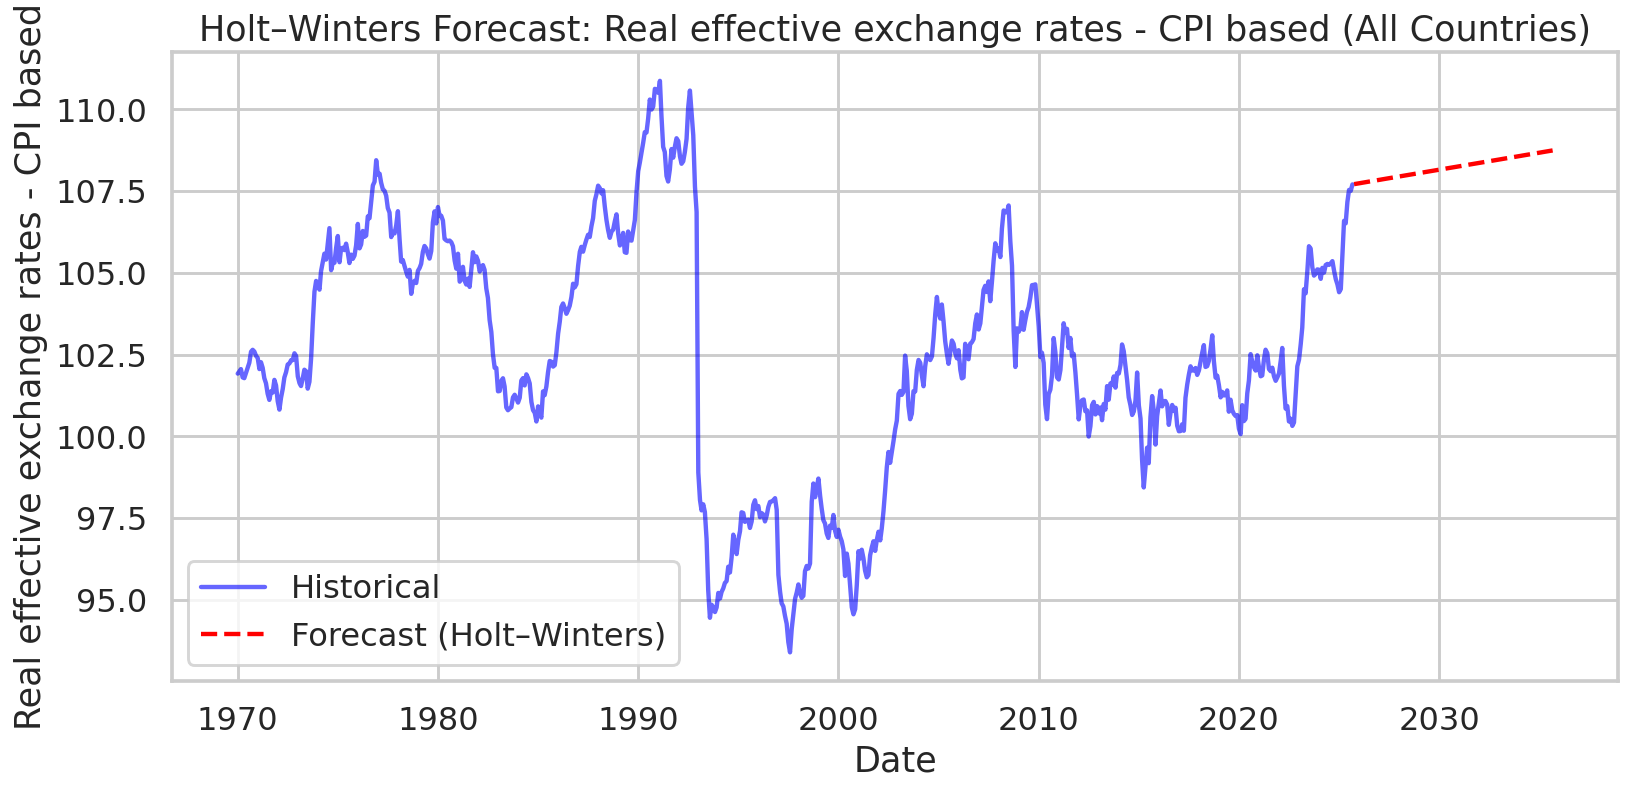

In [182]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

for indicator_name in avg_df["indicator"].unique():
    subset = avg_df[avg_df["indicator"] == indicator_name].copy()
    subset = subset.set_index("date").sort_index()
    series = subset["value_scaled"].dropna()

    if len(series) < 15:
        continue

    model = ExponentialSmoothing(series, trend="add", seasonal=None)
    fitted = model.fit()

    forecast = fitted.forecast(steps=120)
    future_dates = pd.date_range(series.index[-1] + pd.offsets.MonthBegin(), periods=120, freq="MS")

    plt.figure(figsize=(12,6))
    plt.plot(series.index, series, label="Historical", color="blue", alpha=0.6)
    plt.plot(future_dates, forecast, label="Forecast (Holt–Winters)", color="red", linestyle="--")
    plt.title(f"Holt–Winters Forecast: {indicator_name} (All Countries)")
    plt.xlabel("Date")
    plt.ylabel(subset["indicator"].iloc[0])
    plt.legend()
    plt.tight_layout()
    plt.show()

### 4.3 Monte Carlo Simulation

For the final simulation, I got the chance to explore how each indicator might evolve under uncertainty, rather than following a single predicted line. To do this, I applied a Monte Carlo simulation using the European average of all 26 countries for each indicator. This approach was more consistent with the rest of my project. I first tried outcomes for all 26 countries, but their average provided a cleaner, regional-level view compared. They were too noisy and hard to interpret.

In the code, I first calculated the average monthly value of each indicator across all countries. Then, I computed the historical returns to estimate the average growth rate (μ) and volatility (σ). Using these values, I generated 10 random future paths for the next year, simulating how each indicator could fluctuate based on its past behavior. Each gray line represents a possible outcome, showing the range of potential futures rather than one fixed forecast. This technique gives a more realistic picture of uncertainty and helps visualize how European-level economic indicators might behave under different random market conditions.

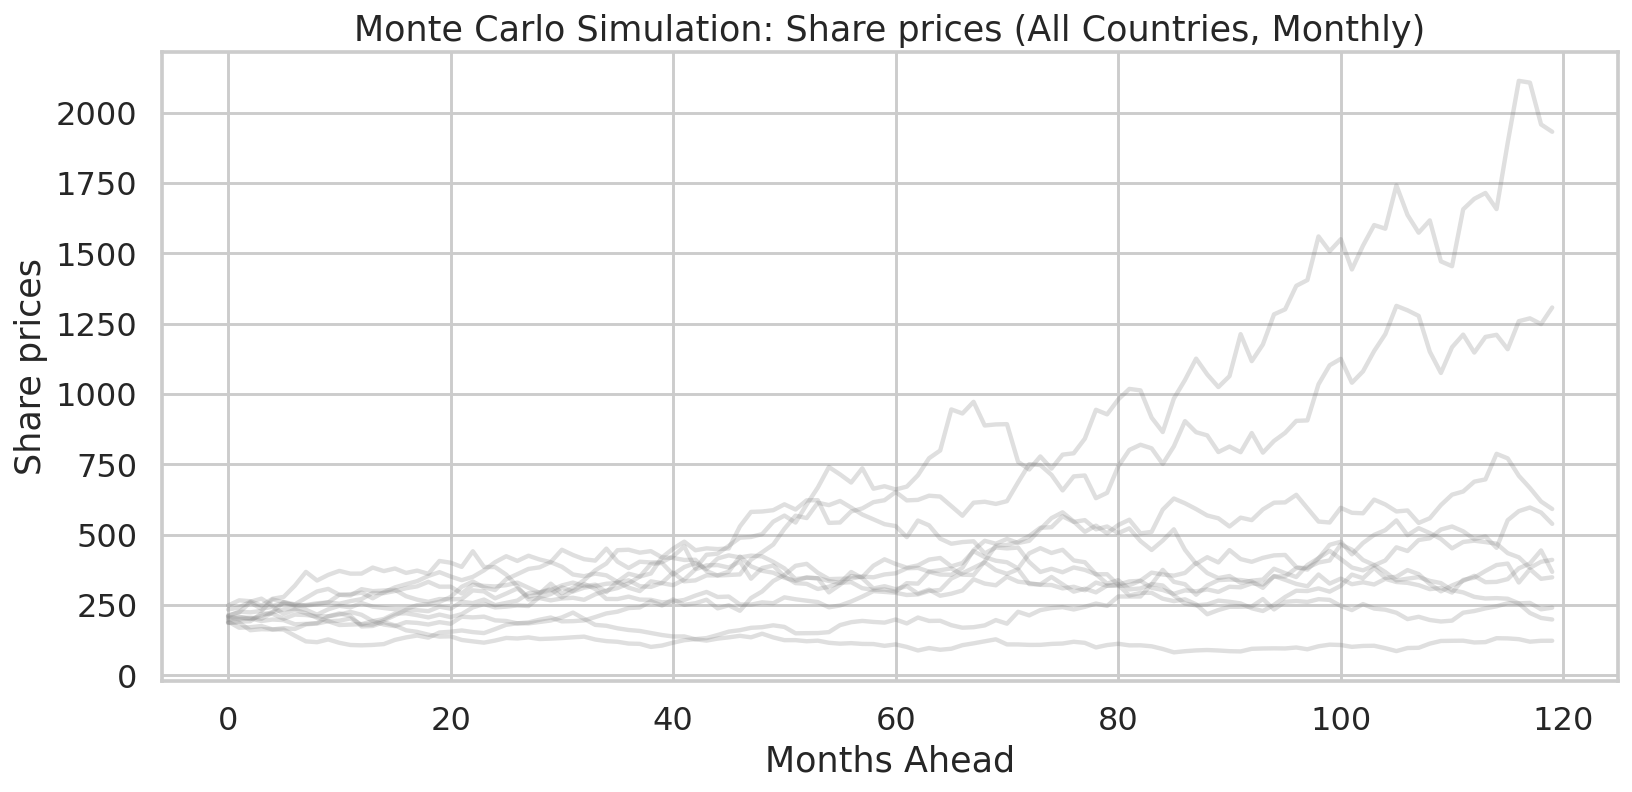

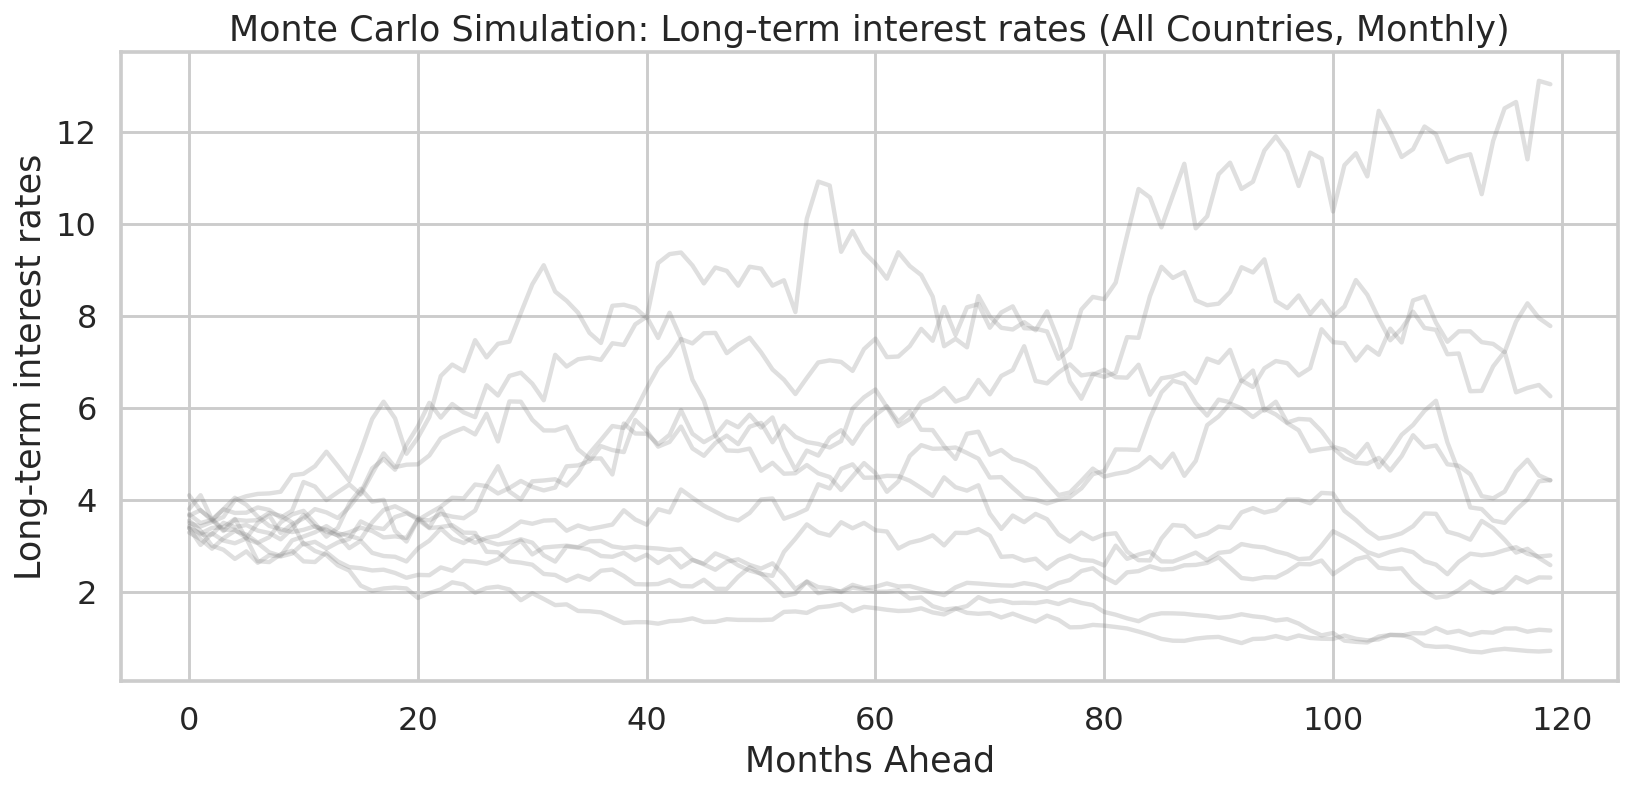

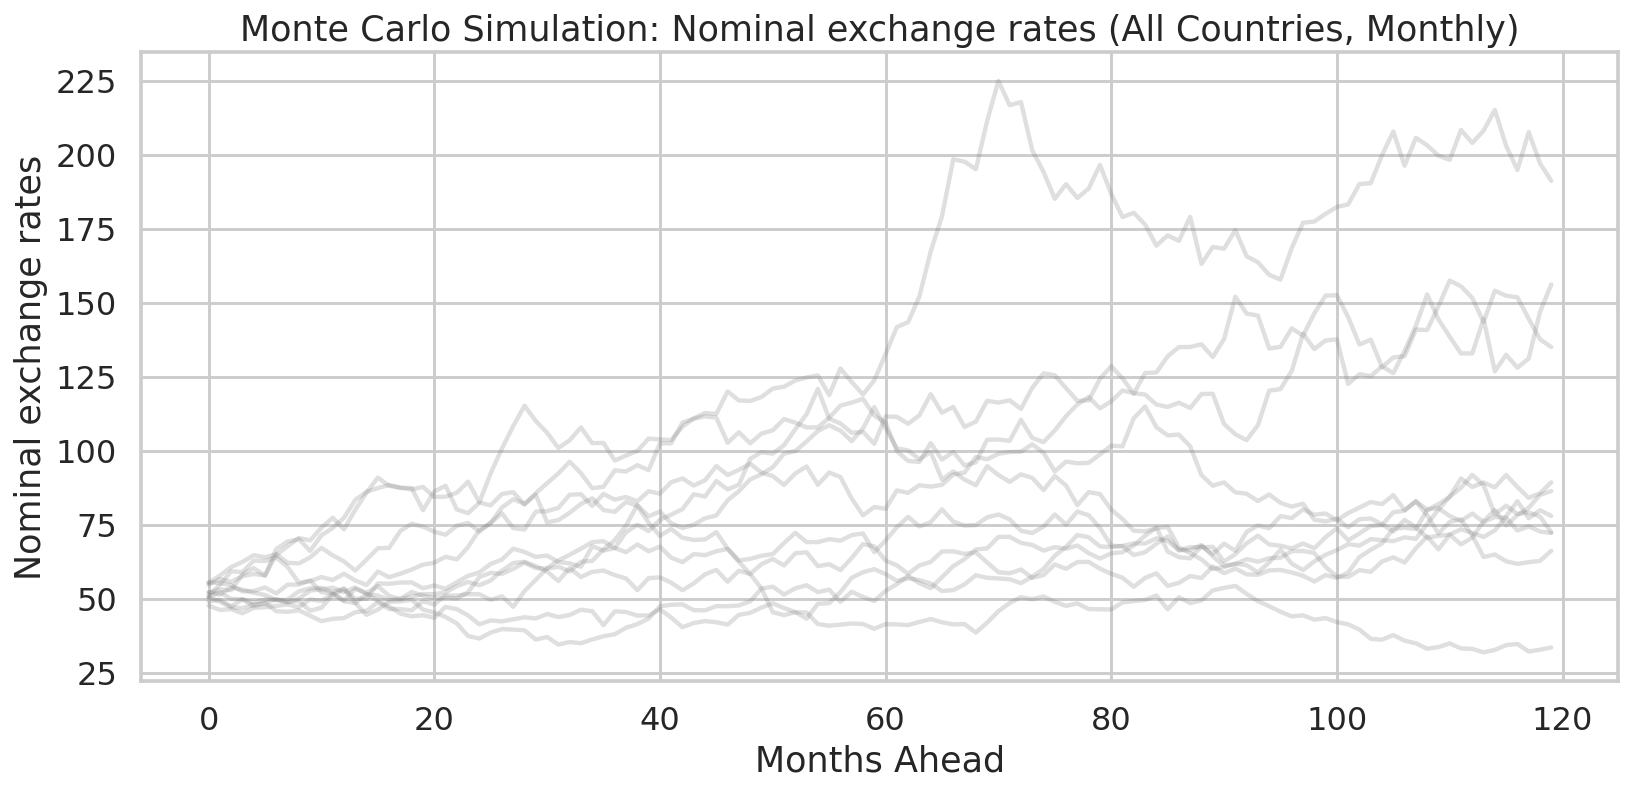

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


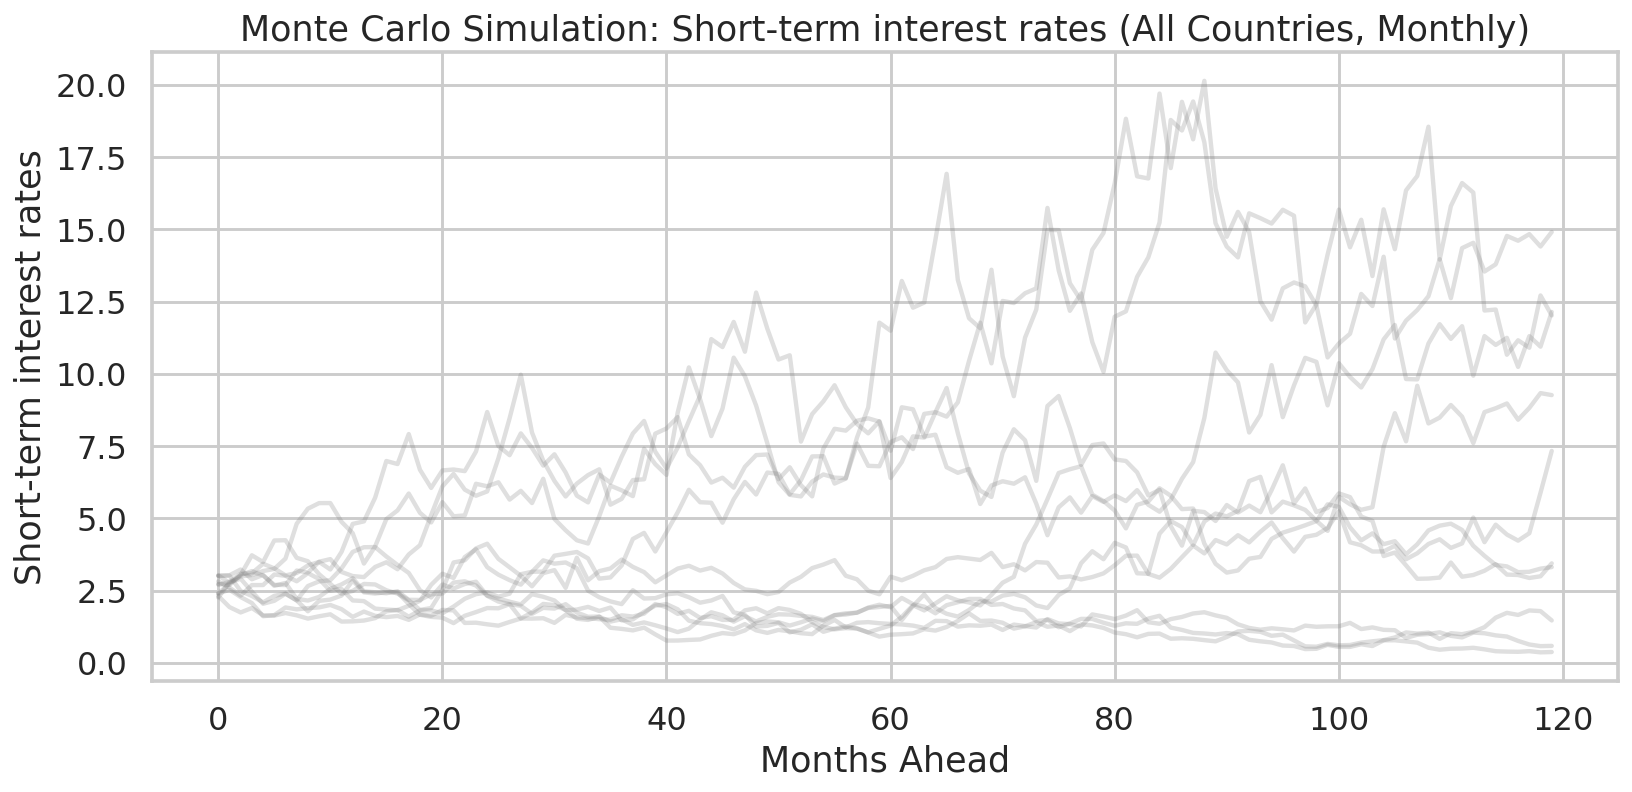

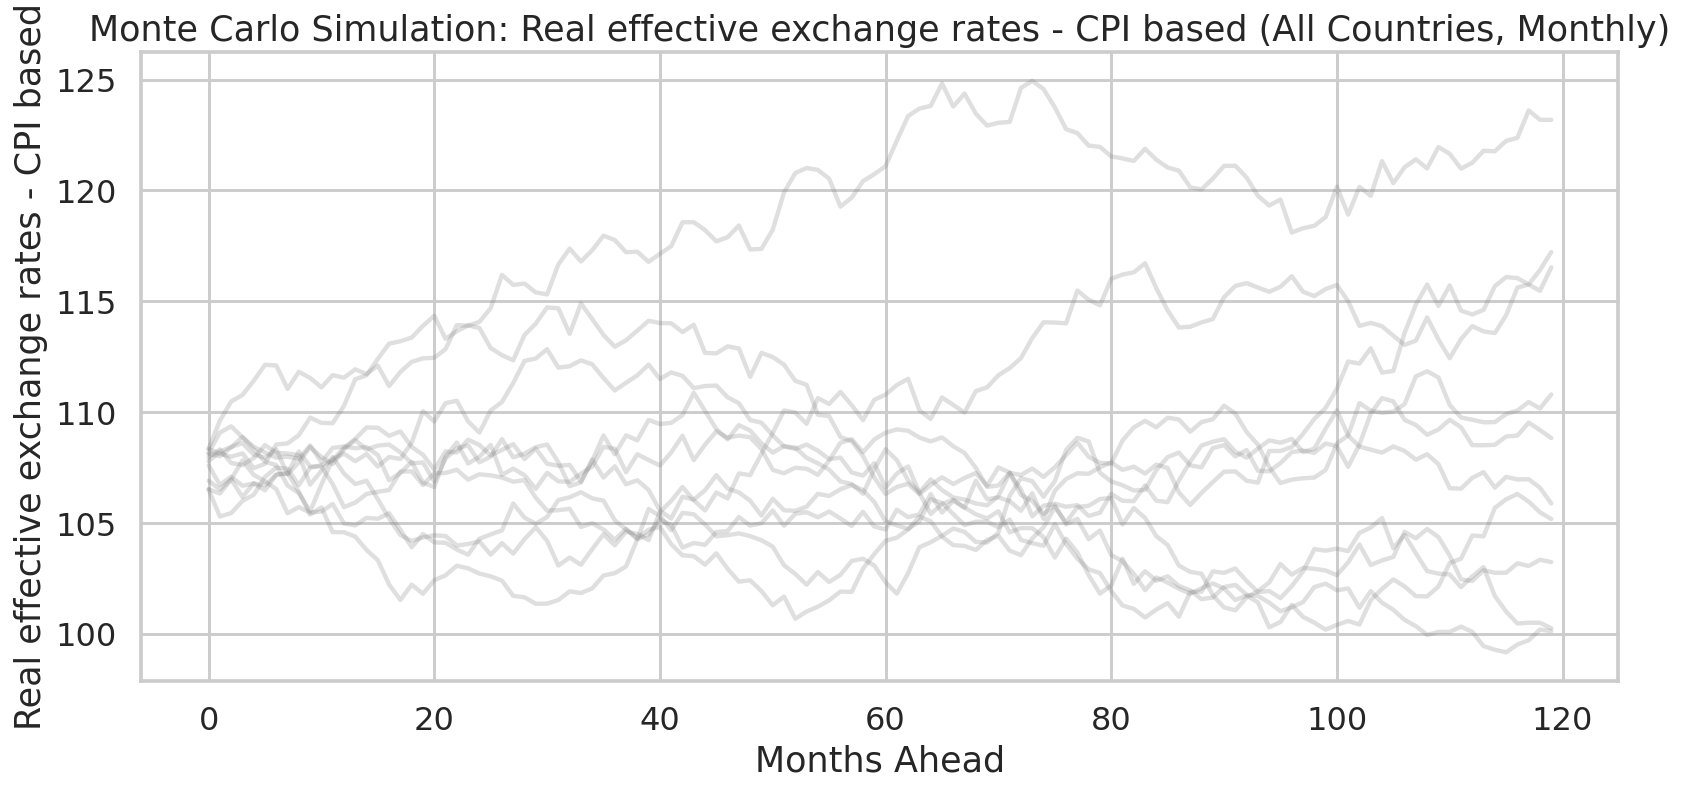

In [183]:
avg_df = (
    clean_df.groupby(["date", "indicator"])["value_scaled"]
    .mean()
    .reset_index()
    .sort_values("date")
)

for indicator_name in avg_df["indicator"].unique():
    s = (
        avg_df[avg_df["indicator"] == indicator_name]
        .set_index("date")["value_scaled"]
        .dropna()
    )

    r = np.log(s).diff().dropna()

    mu, sigma = r.mean(), r.std()
    n_sims = 10
    n_months = 120
    last_val = s.iloc[-1]

    sims = np.zeros((n_months, n_sims))
    for i in range(n_sims):
        shocks = np.random.normal(mu, sigma, n_months)
        sims[:, i] = last_val * np.exp(np.cumsum(shocks))

    plt.figure(figsize=(12, 6))
    plt.plot(sims, alpha=0.25, color="gray")
    plt.title(f"Monte Carlo Simulation: {indicator_name} (All Countries, Monthly)")
    plt.xlabel("Months Ahead")
    plt.ylabel(indicator_name)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##5. Findings and Conclusions
###5.1 General Trends and Insights

Looking at all indicators together, Europe’s overall economic behavior shows long-term growth with a few major cycles of instability. Share prices have followed an impressive upward trend since the 1990s, with a sharp fall during the 2008 financial crisis, followed by a steady recovery and strong performance in recent years. Since the 1950s, share prices have increased by roughly 2.9% per year on average (around 200% over 70 years), showing long-term investor confidence. Both short-term and long-term interest rates reached their peaks during the 1980s and have been trending downward since around 1995, reflecting Europe’s long monetary easing cycle. Nominal exchange rates show an upward trend, signaling gradual currency depreciation against the U.S. dollar, while real effective exchange rates dipped notably in the 1990s and during the 2008 crisis, indicating periods of weakened competitiveness.

Overall, the data captures clear long-term patterns of recovery and stabilization. Despite inflationary pressure in recent years, the rise in share prices suggests underlying economic strength and market resilience.

###5.2 Indicator-Specific Findings

Among all indicators, long-term interest rates are the most stable, while real effective exchange rates are the most volatile. The strong relationship between short and long-term rates is consistent with how central bank policies shape both lending costs and bond yields. Exchange rate indicators, especially the nominal ones, fluctuate more sharply, reflecting inflation dynamics and differences in currency policy across countries.

Share prices show the strongest upward momentum, closely tied to market recovery cycles and investor optimism. Meanwhile, real effective exchange rates fluctuate around 100, as expected, with outliers like Czechia reaching unusually high index levels (around 160). Countries using the euro display smoother and more synchronized trends, while non-euro countries, such as Hungary, Iceland, and Poland, show greater volatility due to independent monetary policies and currency fluctuations.

###5.3 Cross-Country Patterns

The cross-country visualizations highlight clear differences between eurozone and non-eurozone economies. Eurozone countries, which share the same currency, show tightly aligned behavior in most indicators, while countries with their own currencies experience more pronounced swings. Hungary and Iceland stand out for having very volatile exchange rates and higher inflation exposure compared to the eurozone average.

The yield curve spread (long-term minus short-term interest rates) shows that most European countries remain concentrated around zero percentage points, with only occasional outliers. These outliers, like Iceland and Greece, display temporary yield curve inversions or exaggerated spreads that normalize over roughly five years. Overall, the yield curve data suggests a stable but diverse regional financial landscape, where countries with independent currencies exhibit higher risk and greater variability.

###5.4 Correlations and Relationships

The correlation heatmap confirmed several expected economic relationships. Short-term and long-term interest rates move almost perfectly together (r = 0.92), reflecting how central bank policy decisions affect both ends of the yield curve. Share prices and nominal exchange rates are also highly correlated (r = 0.9), meaning that when local currencies weaken against the dollar, share prices often rise in domestic terms, typically because currency depreciation improves exporters’ competitiveness.

Interest rates and share prices show a strong negative relationship (around –0.6), which aligns with real-world behavior: higher borrowing costs tend to reduce investment and market growth. Real effective exchange rates (CPI-based) have weaker correlations with other variables, since they reflect long-term structural competitiveness rather than short-term financial market movements.

###5.5 Predictive Models and Simulations

The predictive models indicate generally positive expectations for Europe’s financial outlook. The rolling average simulations closely follow the historical trends, smoothing out short-term fluctuations while maintaining the same direction as the raw data. The Holt–Winters exponential smoothing model predicts continued growth in share prices and a mild upward correction in interest rates , both healthy signs for a region currently managing inflationary challenges.

The Monte Carlo simulations provided a probabilistic perspective, showing a wide but balanced range of possible future outcomes. Most simulated paths remained centered and positive, with no extreme downward scenarios, suggesting market stability and moderate optimism. Together, these forecasting models paint a picture of a steady European recovery, supported by stable financial systems and improving investor confidence.

###5.6 Reflections and Future Work

The most valuable part of this project was gaining hands-on experience with real economic data and seeing how predictive modeling can reveal trends that aren’t obvious at first glance. In finance, being able to interpret and project data accurately is one of the most valuable skills, and this project helped me understand how to connect technical tools with economic reasoning.

The biggest technical challenge was refining the code and visualizations to present the data exactly how I wanted , AI tools were helpful but required careful direction to match my goals. If I were to continue this project, I would expand the dataset to include more variables and longer time periods, building a more powerful predictive framework. The goal would be to create a “big data” forecasting engine that could learn from historical behavior and continually improve its predictions , not to be perfectly right all the time, but to be informed by as much data as possible.